<a href="https://colab.research.google.com/github/G-Shakunthala55/AI-PriceOptima/blob/main/AI_PriceOptima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1. Import Required Libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# 2. Load Dataset
df = pd.read_csv("/content/dynamic_pricing (1).csv")
# Step 1: Basic Dataset Overview
# Rows&Columns
print("Shape of Dataset:", df.shape)
print("\nDataset Info:")
df.info()
# First & Last Rows
print("\nFirst 5 Rows:\n", df.head())
print("\nLast 5 Rows:\n", df.tail())

Shape of Dataset: (1000, 10)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Number_of_Riders         1000 non-null   int64  
 1   Number_of_Drivers        1000 non-null   int64  
 2   Location_Category        1000 non-null   object 
 3   Customer_Loyalty_Status  1000 non-null   object 
 4   Number_of_Past_Rides     1000 non-null   int64  
 5   Average_Ratings          1000 non-null   float64
 6   Time_of_Booking          1000 non-null   object 
 7   Vehicle_Type             1000 non-null   object 
 8   Expected_Ride_Duration   1000 non-null   int64  
 9   Historical_Cost_of_Ride  1000 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 78.3+ KB

First 5 Rows:
    Number_of_Riders  Number_of_Drivers Location_Category  \
0                90                 45             Urban   
1  

In [ ]:
# Summary statistics for numeric data
print("\nSummary Statistics (Numerical):\n", df.describe())
# Summary statistics for categorical data
print("\nSummary Statistics (Categorical):\n", df.describe(include='object'))


Summary Statistics (Numerical):
        Number_of_Riders  Number_of_Drivers  Number_of_Past_Rides  \
count       1000.000000        1000.000000           1000.000000   
mean          60.372000          27.076000             50.031000   
std           23.701506          19.068346             29.313774   
min           20.000000           5.000000              0.000000   
25%           40.000000          11.000000             25.000000   
50%           60.000000          22.000000             51.000000   
75%           81.000000          38.000000             75.000000   
max          100.000000          89.000000            100.000000   

       Average_Ratings  Expected_Ride_Duration  Historical_Cost_of_Ride  
count      1000.000000              1000.00000              1000.000000  
mean          4.257220                99.58800               372.502623  
std           0.435781                49.16545               187.158756  
min           3.500000                10.00000           

In [ ]:
#Step 2: Data Quality Checks
# 1. Missing values
print("\nMissing Values Count:\n", df.isna().sum())
# 2. Duplicate rows
print("\nDuplicate Rows Count:", df.duplicated().sum())
# 3. Data types
print("\nData Types of Columns:\n", df.dtypes)
# 4. Column counts
print("\nNumber of Columns:", df.shape[1])


Missing Values Count:
 Number_of_Riders           0
Number_of_Drivers          0
Location_Category          0
Customer_Loyalty_Status    0
Number_of_Past_Rides       0
Average_Ratings            0
Time_of_Booking            0
Vehicle_Type               0
Expected_Ride_Duration     0
Historical_Cost_of_Ride    0
dtype: int64

Duplicate Rows Count: 0

Data Types of Columns:
 Number_of_Riders             int64
Number_of_Drivers            int64
Location_Category           object
Customer_Loyalty_Status     object
Number_of_Past_Rides         int64
Average_Ratings            float64
Time_of_Booking             object
Vehicle_Type                object
Expected_Ride_Duration       int64
Historical_Cost_of_Ride    float64
dtype: object

Number of Columns: 10


In [ ]:
# Step 3: Sanity Checks
# Negative / Impossible values check
print("\nRows with Riders <= 0:\n", df[df['Number_of_Riders'] <= 0])
print("\nRows with Drivers <= 0:\n", df[df['Number_of_Drivers'] <= 0])
print("\nRows with Negative Past Rides:\n", df[df['Number_of_Past_Rides'] < 0])
print("\nRows with Invalid Ratings (not 1–5):\n",
      df[(df['Average_Ratings'] < 1) | (df['Average_Ratings'] > 5)])
print("\nRows with Invalid Ride Duration:\n", df[df['Expected_Ride_Duration'] <= 0])
print("\nRows with Invalid Cost:\n", df[df['Historical_Cost_of_Ride'] <= 0])
print("\nRows where Riders < Drivers (unusual):\n",
      df[df['Number_of_Riders'] < df['Number_of_Drivers']])



Rows with Riders <= 0:
 Empty DataFrame
Columns: [Number_of_Riders, Number_of_Drivers, Location_Category, Customer_Loyalty_Status, Number_of_Past_Rides, Average_Ratings, Time_of_Booking, Vehicle_Type, Expected_Ride_Duration, Historical_Cost_of_Ride]
Index: []

Rows with Drivers <= 0:
 Empty DataFrame
Columns: [Number_of_Riders, Number_of_Drivers, Location_Category, Customer_Loyalty_Status, Number_of_Past_Rides, Average_Ratings, Time_of_Booking, Vehicle_Type, Expected_Ride_Duration, Historical_Cost_of_Ride]
Index: []

Rows with Negative Past Rides:
 Empty DataFrame
Columns: [Number_of_Riders, Number_of_Drivers, Location_Category, Customer_Loyalty_Status, Number_of_Past_Rides, Average_Ratings, Time_of_Booking, Vehicle_Type, Expected_Ride_Duration, Historical_Cost_of_Ride]
Index: []

Rows with Invalid Ratings (not 1–5):
 Empty DataFrame
Columns: [Number_of_Riders, Number_of_Drivers, Location_Category, Customer_Loyalty_Status, Number_of_Past_Rides, Average_Ratings, Time_of_Booking, Vehicl

In [ ]:
# Step 4: Column Classification
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
print("\nNumerical Columns:\n", num_cols)
print("\nCategorical Columns:\n", cat_cols)



Numerical Columns:
 ['Number_of_Riders', 'Number_of_Drivers', 'Number_of_Past_Rides', 'Average_Ratings', 'Expected_Ride_Duration', 'Historical_Cost_of_Ride']

Categorical Columns:
 ['Location_Category', 'Customer_Loyalty_Status', 'Time_of_Booking', 'Vehicle_Type']


In [ ]:
# Step 5: Categorical Value Counts
print("\nCategorical Value Counts:")
for col in cat_cols:
    print(f"\n{col}:\n", df[col].value_counts())



Categorical Value Counts:

Location_Category:
 Location_Category
Urban       346
Rural       332
Suburban    322
Name: count, dtype: int64

Customer_Loyalty_Status:
 Customer_Loyalty_Status
Silver     367
Regular    320
Gold       313
Name: count, dtype: int64

Time_of_Booking:
 Time_of_Booking
Night        276
Afternoon    247
Morning      246
Evening      231
Name: count, dtype: int64

Vehicle_Type:
 Vehicle_Type
Premium    522
Economy    478
Name: count, dtype: int64



Correlation Matrix:
                          Number_of_Riders  Number_of_Drivers  \
Number_of_Riders                 1.000000           0.627016   
Number_of_Drivers                0.627016           1.000000   
Number_of_Past_Rides             0.029265           0.039660   
Average_Ratings                  0.008572           0.041204   
Expected_Ride_Duration          -0.015856          -0.024418   
Historical_Cost_of_Ride          0.005826           0.017082   

                         Number_of_Past_Rides  Average_Ratings  \
Number_of_Riders                     0.029265         0.008572   
Number_of_Drivers                    0.039660         0.041204   
Number_of_Past_Rides                 1.000000        -0.064734   
Average_Ratings                     -0.064734         1.000000   
Expected_Ride_Duration               0.030679        -0.016968   
Historical_Cost_of_Ride              0.035859        -0.001063   

                         Expected_Ride_Duration  Historical_Cost_o

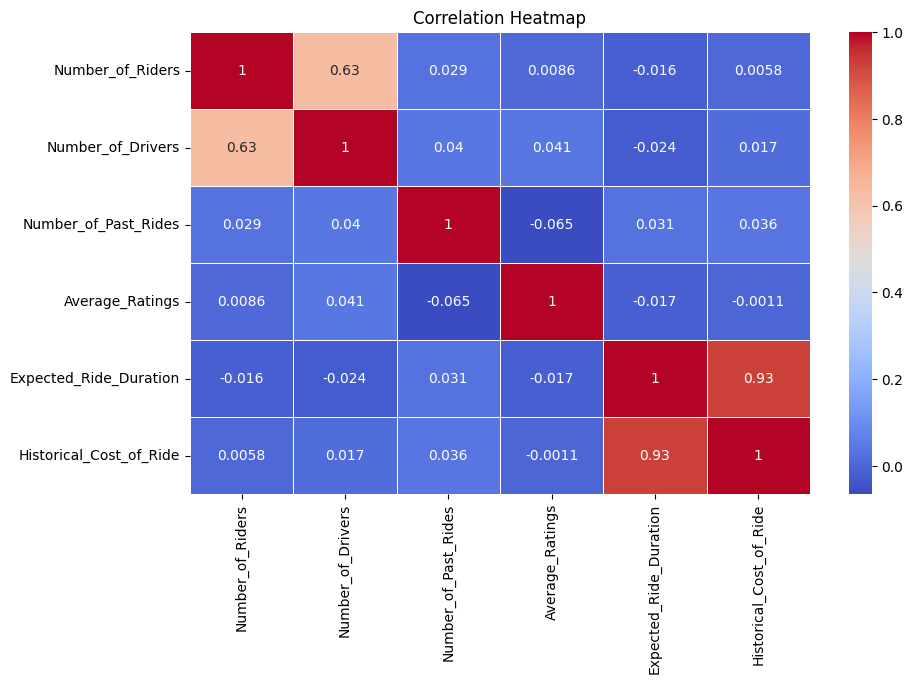

In [ ]:
# Step 6: Correlation Analysis
print("\nCorrelation Matrix:\n", df.corr(numeric_only=True))
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

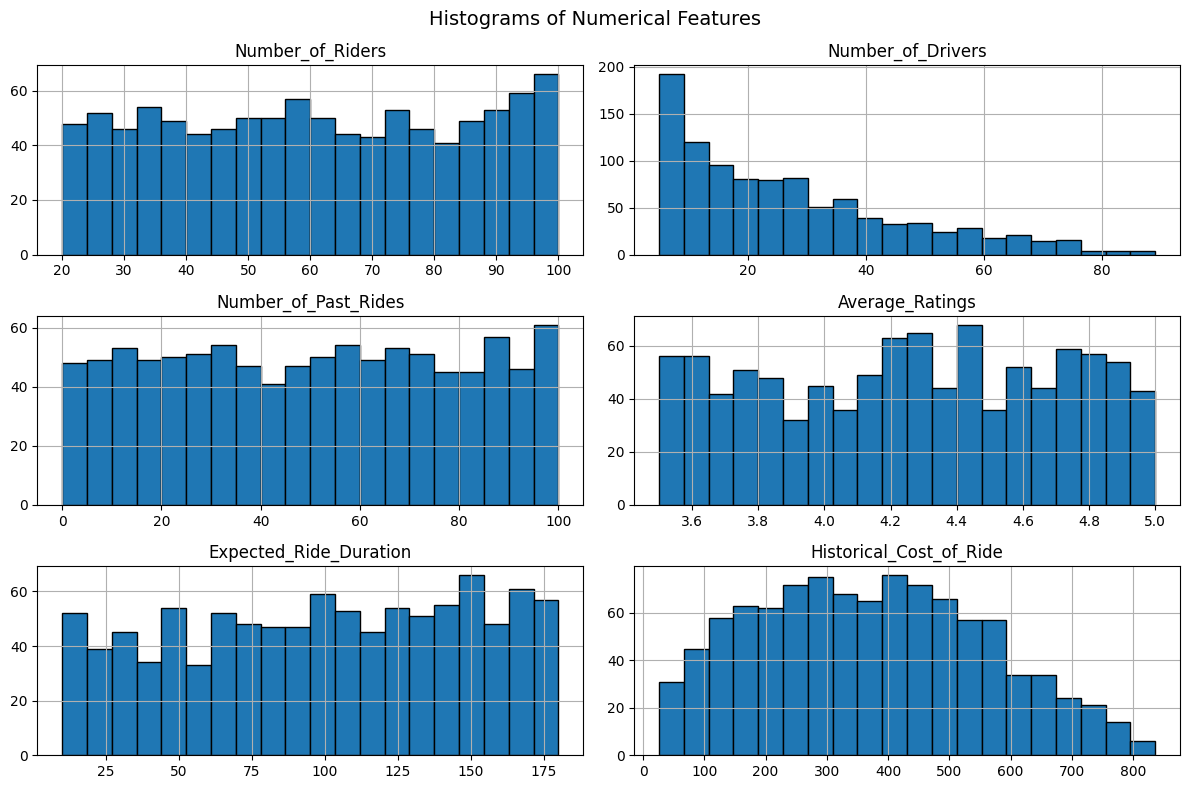

In [ ]:
# Step 7: Distribution of Numerical Features
df.hist(figsize=(12,8), bins=20, edgecolor="black")
plt.suptitle("Histograms of Numerical Features", fontsize=14)
plt.tight_layout()
plt.show()

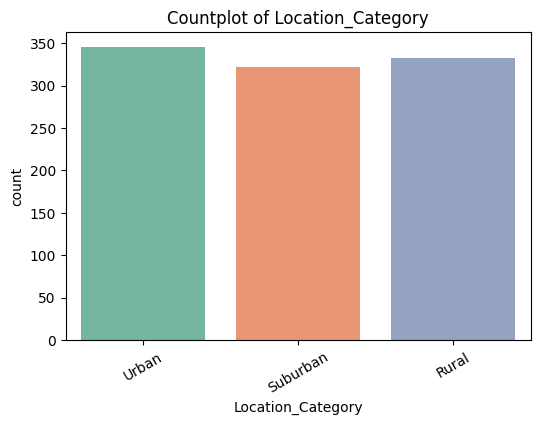

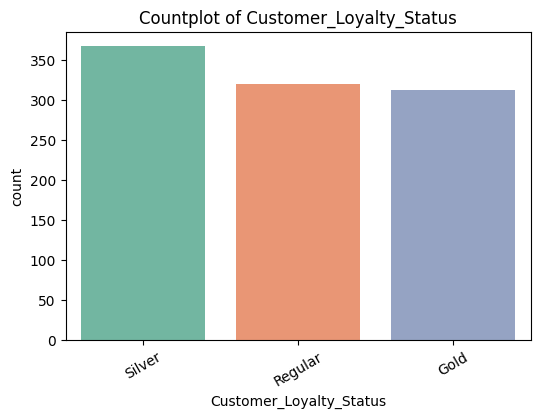

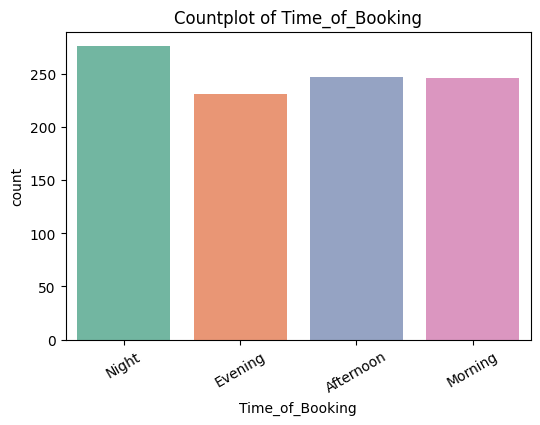

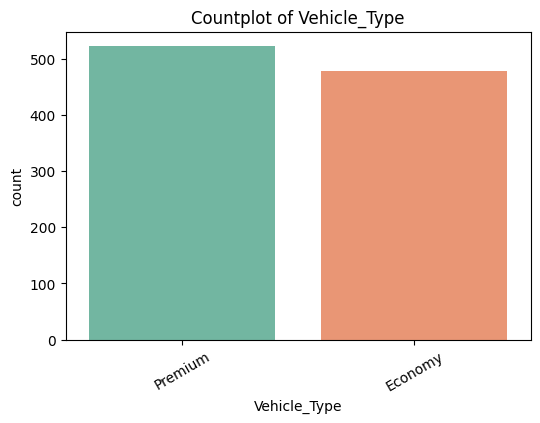

In [ ]:
# Step 8: Categorical Visualizations
for col in cat_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, hue=col, data=df, palette="Set2", legend=False)
    plt.title(f"Countplot of {col}")
    plt.xticks(rotation=30)
    plt.show()


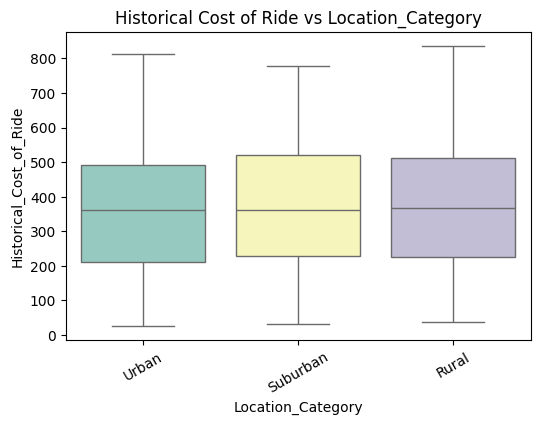

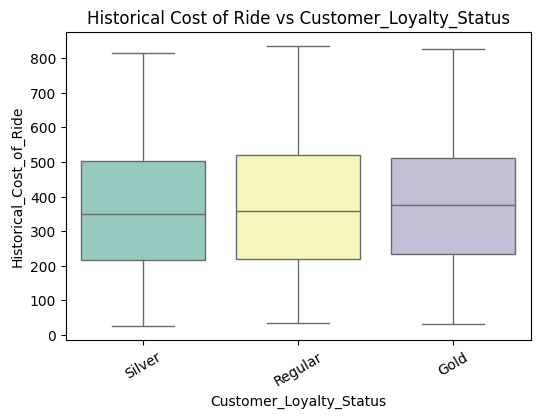

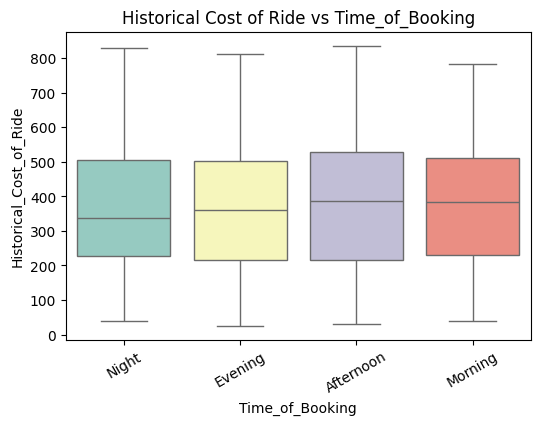

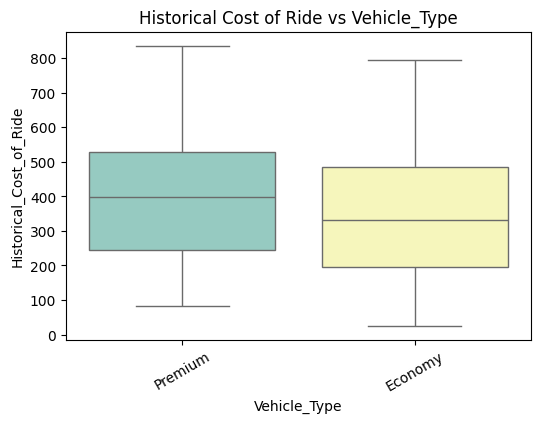

In [ ]:
# Step 9: Numerical vs Categorical (Boxplots)
for col in cat_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=col, y="Historical_Cost_of_Ride", hue=col, data=df, palette="Set3", legend=False)
    plt.title(f"Historical Cost of Ride vs {col}")
    plt.xticks(rotation=30)
    plt.show()


In [ ]:
import pandas as pd
import numpy as np
# Load dataset
df = pd.read_csv("/content/dynamic_pricing (1).csv")
# Outlier Detection (IQR & Z-Score)
numeric_cols = df.select_dtypes(include=[np.number]).columns
outliers_iqr = {}
outliers_zscore = {}
for col in numeric_cols:
    # --- IQR method ---
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_iqr[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
    # --- Z-score method ---
    mean = df[col].mean()
    std = df[col].std()
    if std != 0: # avoid divide-by-zero
        z_scores = (df[col] - mean) / std
        outliers_zscore[col] = (np.abs(z_scores) > 3).sum()
    else:
        outliers_zscore[col] = 0
# Print Outlier Results
print("Outlier Counts (IQR Method):")
for col, count in outliers_iqr.items():
    print(f"{col}: {count}")
print("Outlier Counts (Z-score Method):")
for col, count in outliers_zscore.items():
    print(f"{col}: {count}")
# KPI Utility Functions
def kpi_average_cost(df):
    return df["Historical_Cost_of_Ride"].mean()
def kpi_average_duration(df):
    return df["Expected_Ride_Duration"].mean()
def kpi_average_rating(df):
    return df["Average_Ratings"].mean()
def kpi_rider_driver_ratio(df):
    return (df["Number_of_Riders"].sum() / df["Number_of_Drivers"].sum()).round(2)
def kpi_total_rides(df):
    return df["Number_of_Past_Rides"].sum()
def kpi_loyalty_distribution(df):
    return df["Customer_Loyalty_Status"].value_counts(normalize=True) * 100
def kpi_vehicle_utilization(df):
    return df["Vehicle_Type"].value_counts(normalize=True) * 100
# Print KPI Dashboard
print("KPI Dashboard")
print("-------------------------------")
print("Average Ride Cost: ₹", round(kpi_average_cost(df), 2))
print("Average Ride Duration (mins):", round(kpi_average_duration(df), 2))
print("Average Customer Rating:", round(kpi_average_rating(df), 2))
print("Riders-to-Drivers Ratio:", kpi_rider_driver_ratio(df))
print("Total Rides Completed:", kpi_total_rides(df))
print("\n Loyalty Distribution (%):\n", kpi_loyalty_distribution(df))
print("\n Vehicle Utilization (%):\n", kpi_vehicle_utilization(df))


Outlier Counts (IQR Method):
Number_of_Riders: 0
Number_of_Drivers: 10
Number_of_Past_Rides: 0
Average_Ratings: 0
Expected_Ride_Duration: 0
Historical_Cost_of_Ride: 0
Outlier Counts (Z-score Method):
Number_of_Riders: 0
Number_of_Drivers: 4
Number_of_Past_Rides: 0
Average_Ratings: 0
Expected_Ride_Duration: 0
Historical_Cost_of_Ride: 0
KPI Dashboard
-------------------------------
Average Ride Cost: ₹ 372.5
Average Ride Duration (mins): 99.59
Average Customer Rating: 4.26
Riders-to-Drivers Ratio: 2.23
Total Rides Completed: 50031

 Loyalty Distribution (%):
 Customer_Loyalty_Status
Silver     36.7
Regular    32.0
Gold       31.3
Name: proportion, dtype: float64

 Vehicle Utilization (%):
 Vehicle_Type
Premium    52.2
Economy    47.8
Name: proportion, dtype: float64


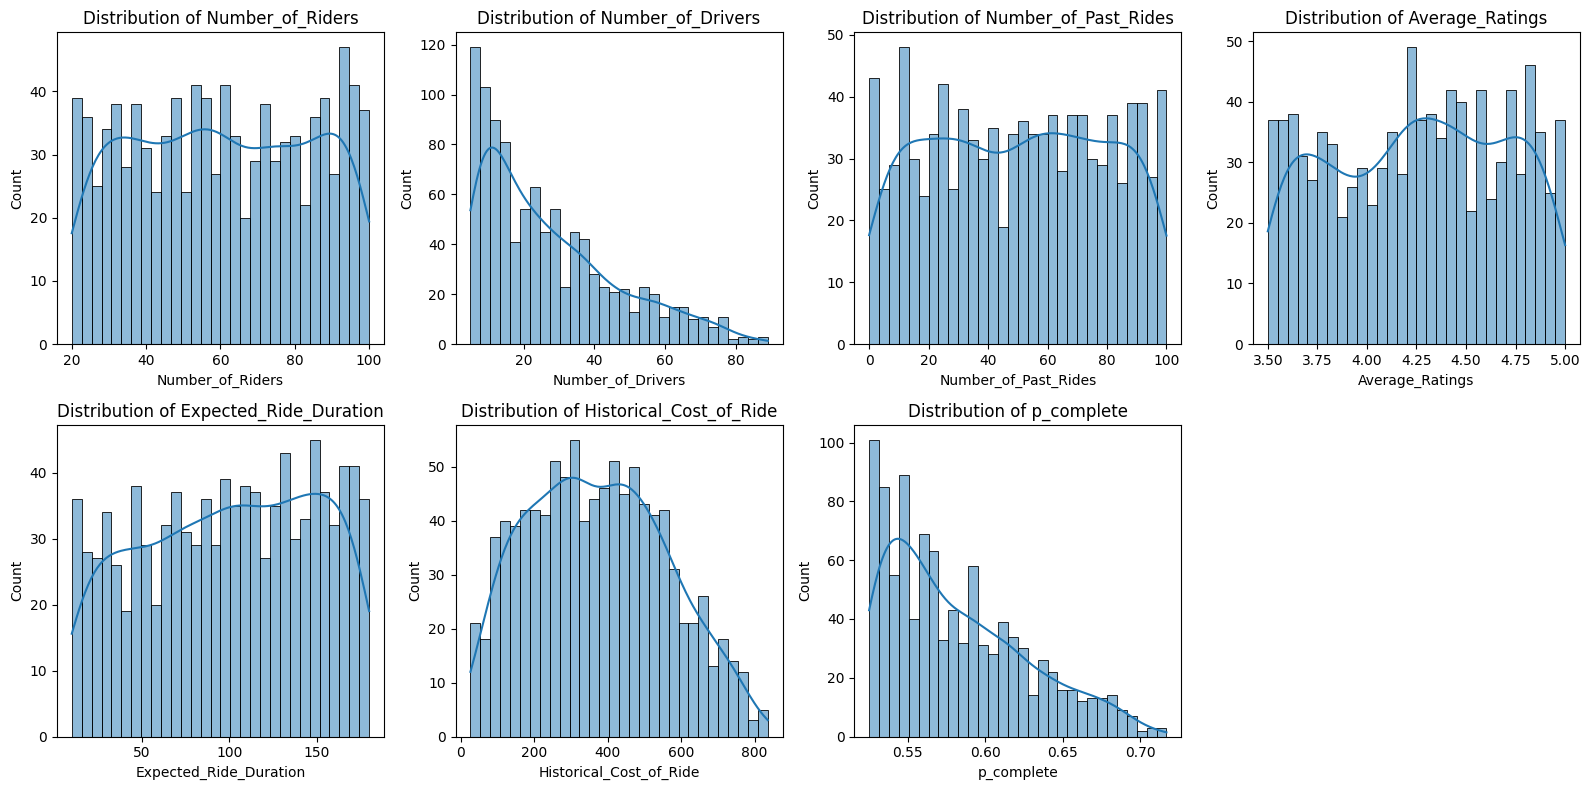

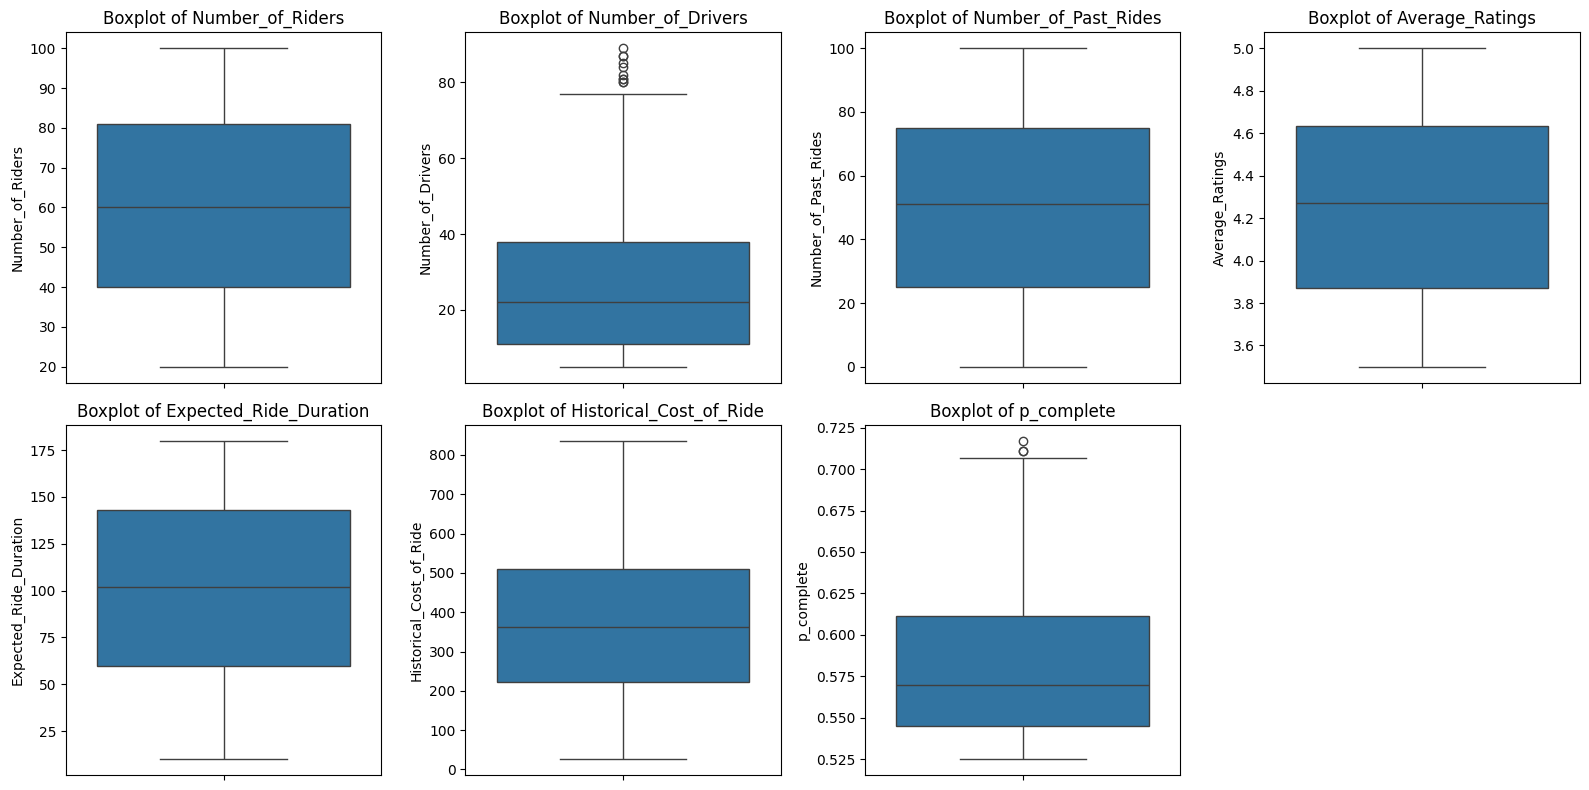

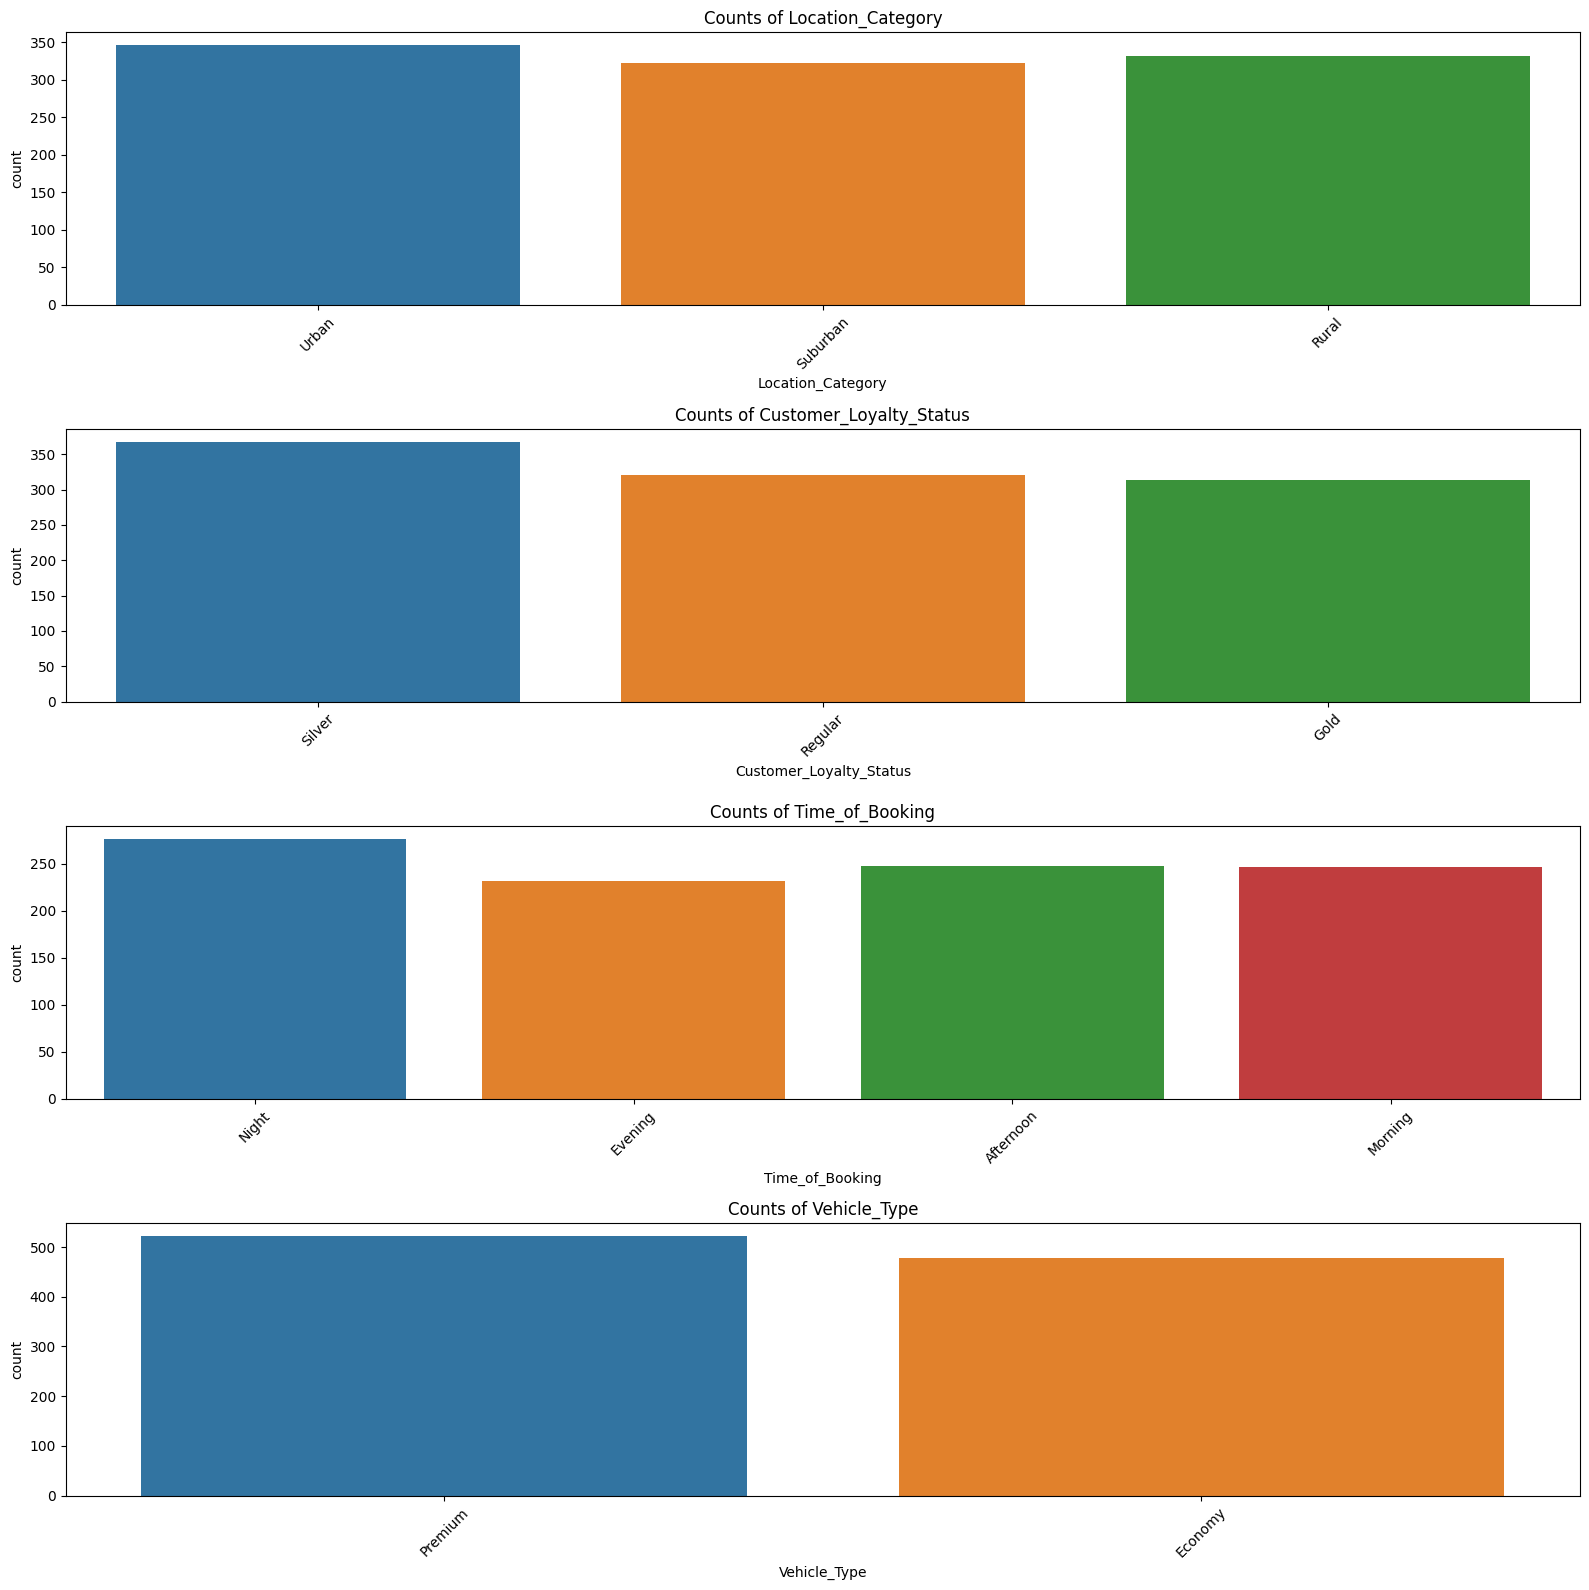

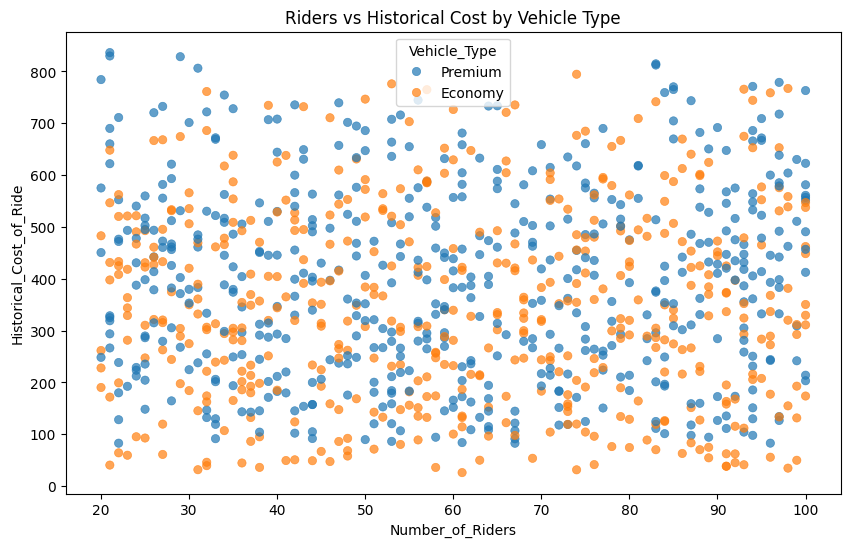

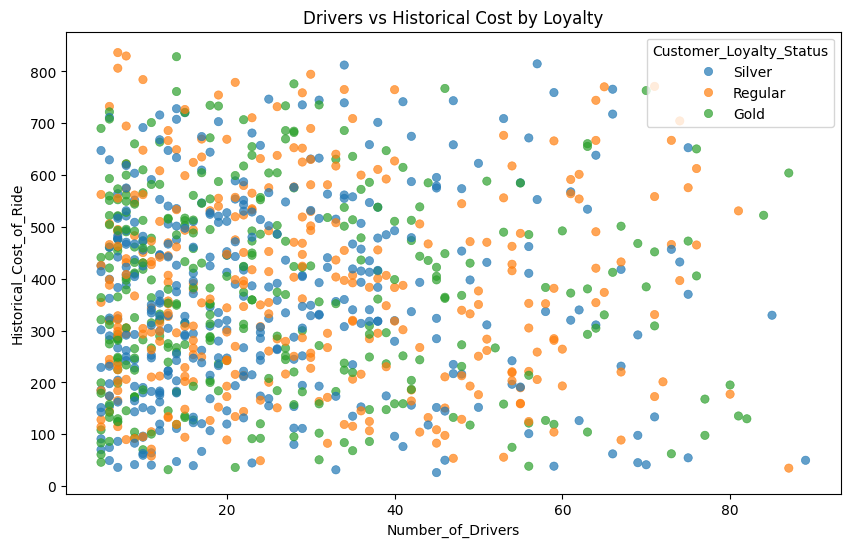

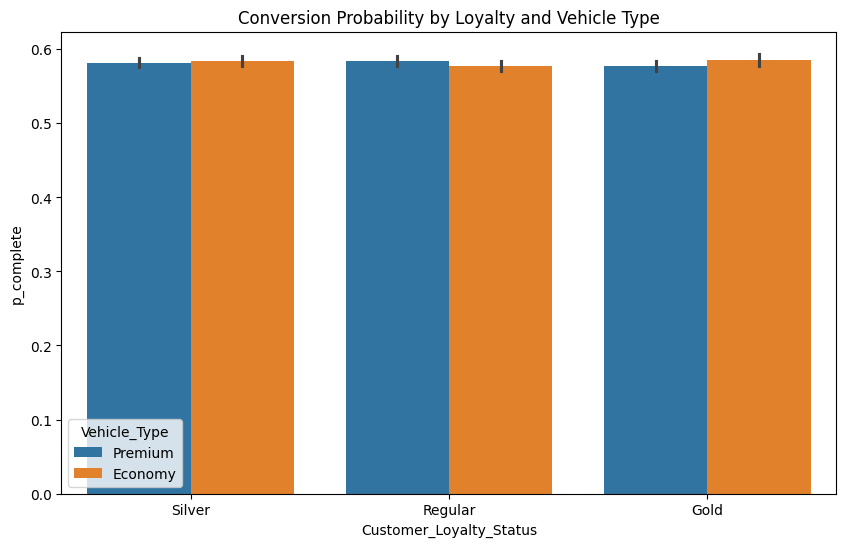

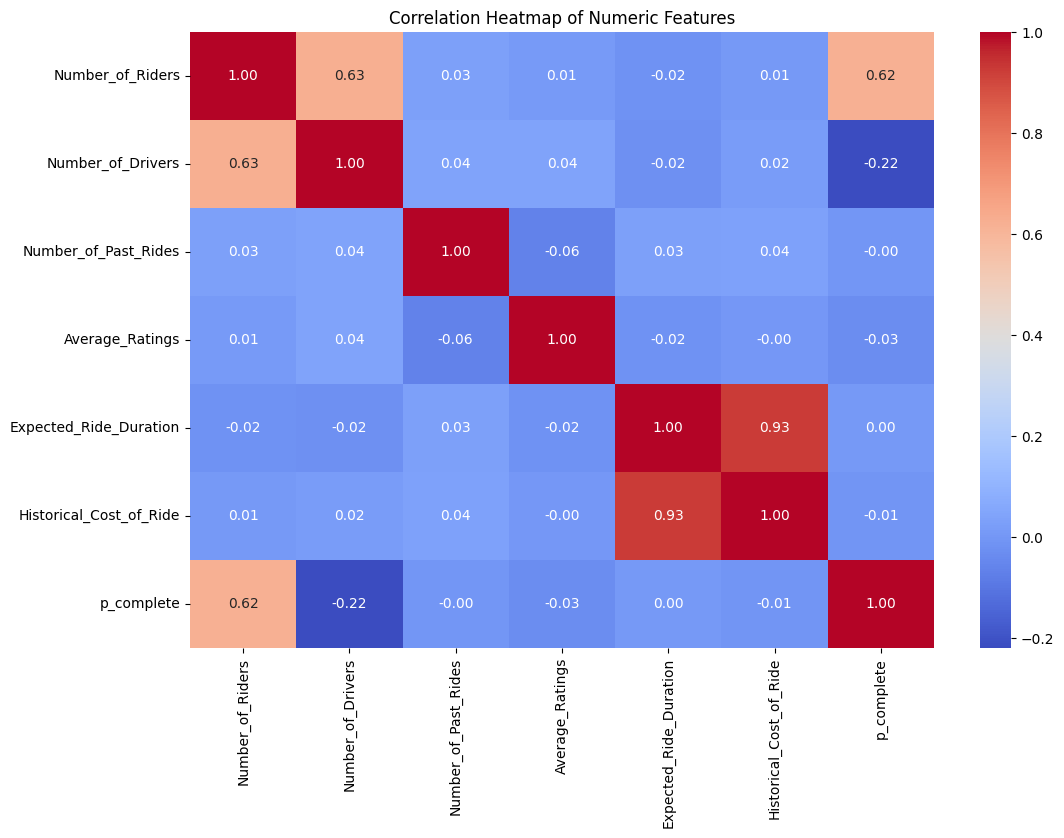

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
df = pd.read_csv("/content/dynamic_pricing (1).csv")
# Feature Engineering: Create p_complete
if "Completed_Rides" in df.columns and "Number_of_Riders" in df.columns:
    df["p_complete"] = df["Completed_Rides"] / df["Number_of_Riders"]
    df["p_complete"] = df["p_complete"].clip(0, 1)  # keep between 0 and 1
else:
    # fallback: simulate a proxy using cost and demand
    df["p_complete"] = 1 / (1 + np.exp(-0.01 * (df["Number_of_Riders"] - df["Number_of_Drivers"])))
# Select numeric and categorical columns
num_cols = df.select_dtypes(include=[np.number]).columns
cat_cols = df.select_dtypes(include=['object']).columns
# Numeric Distributions
n = len(num_cols)
cols = 4
rows = math.ceil(n / cols)
plt.figure(figsize=(16, rows * 4))
for i, col in enumerate(num_cols, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()
# Boxplots for Outlier Detection
plt.figure(figsize=(16, rows * 4))
for i, col in enumerate(num_cols, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()
# Categorical Counts
plt.figure(figsize=(16, len(cat_cols) * 4))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(len(cat_cols), 1, i)
    sns.countplot(data=df, x=col, hue=col, legend=False)
    plt.title(f"Counts of {col}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# Relationships (Scatter Plots)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Number_of_Riders", y="Historical_Cost_of_Ride",
                hue="Vehicle_Type", alpha=0.7, edgecolor=None)
plt.title("Riders vs Historical Cost by Vehicle Type")
plt.show()
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Number_of_Drivers", y="Historical_Cost_of_Ride",
                hue="Customer_Loyalty_Status", alpha=0.7, edgecolor=None)
plt.title("Drivers vs Historical Cost by Loyalty")
plt.show()
# Conversion by Segments (p_complete proxy)
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x="Customer_Loyalty_Status", y="p_complete", hue="Vehicle_Type")
plt.title("Conversion Probability by Loyalty and Vehicle Type")
plt.show()
# Correlation Heatmap
plt.figure(figsize=(12, 8))
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()



Seasonality Analysis:
                 mean_conv  mean_price  total_intents
Time_of_Booking                                      
Afternoon              NaN         NaN          14708
Evening                NaN         NaN          13980
Morning                NaN         NaN          14675
Night                  NaN         NaN          17009


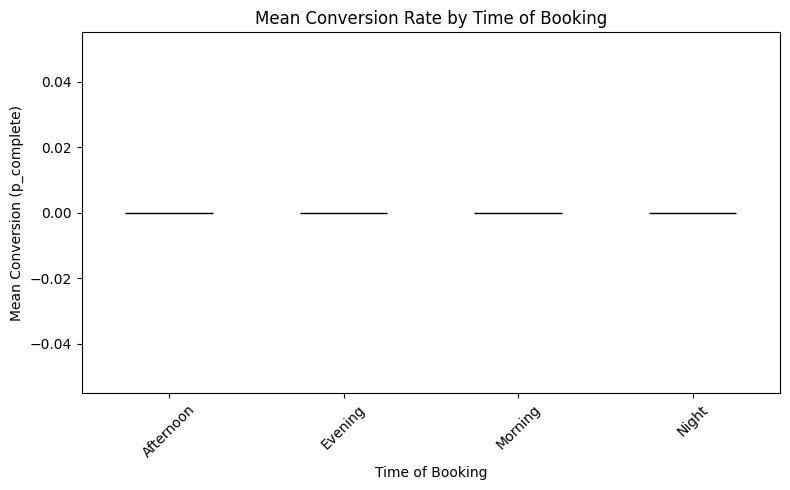


Competitor Pressure Analysis:
              avg_gap_pct  mean_comp_price  mean_our_price
Vehicle_Type                                              
Economy               NaN       311.916059             NaN
Premium               NaN       356.621618             NaN


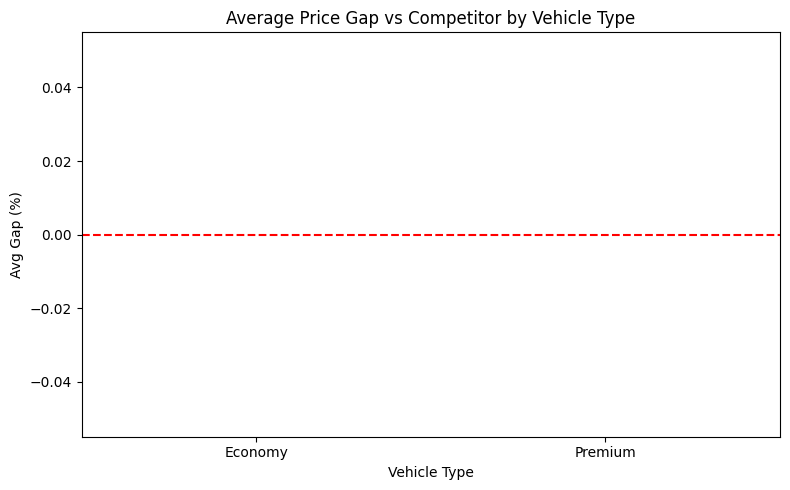

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("/content/dynamic_pricing (1).csv")
# Feature Engineering (to create df_fe)
df_fe = df.copy()
# Clean whitespace from categorical columns
df_fe["Customer_Loyalty_Status"] = df_fe["Customer_Loyalty_Status"].str.strip()
df_fe["Vehicle_Type"] = df_fe["Vehicle_Type"].str.strip()
df_fe["Time_of_Booking"] = df_fe["Time_of_Booking"].str.strip()
# Loyalty mapping
loyalty_map = {"Low": 1, "Medium": 2, "High": 3}
df_fe["Loyalty_Score"] = df_fe["Customer_Loyalty_Status"].map(loyalty_map)
# Vehicle factor (adjusted for Economy / Premium)
vehicle_map = {"Economy": 1.0, "Premium": 1.3}
df_fe["Vehicle_Factor"] = df_fe["Vehicle_Type"].map(vehicle_map)
# Baseline & competitor price
df_fe["baseline_price"] = df_fe["Historical_Cost_of_Ride"]
df_fe["competitor_price"] = df_fe["baseline_price"] * 0.9
# p_complete proxy
df_fe["p_complete"] = (df_fe["Average_Ratings"] / 5) * (df_fe["Loyalty_Score"] / 3)
# Final price
df_fe["price"] = (
    df_fe["baseline_price"]
    * df_fe["Vehicle_Factor"]
    * (1 + 0.05 * df_fe["Loyalty_Score"])
)
# 5.1 Seasonality: Conversion & Price by Time Buckets
seasonality = (
    df_fe.groupby("Time_of_Booking")
        .agg(
            mean_conv=("p_complete", "mean"),
            mean_price=("price", "mean"),
            total_intents=("Number_of_Riders", "sum")
        )
        .sort_values("mean_conv", ascending=False)
)
print("\nSeasonality Analysis:")
print(seasonality)
# Plot conversion by time bucket
plt.figure(figsize=(8, 5))
seasonality["mean_conv"].plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Mean Conversion Rate by Time of Booking")
plt.ylabel("Mean Conversion (p_complete)")
plt.xlabel("Time of Booking")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# 5.2 Competitor Pressure: Price Gap & Index
df_fe["Competitor_Gap_pct"] = (
    (df_fe["price"] - df_fe["competitor_price"])
    / df_fe["competitor_price"] * 100.0
)
comp_pressure = (
    df_fe.groupby("Vehicle_Type")
        .agg(
            avg_gap_pct=("Competitor_Gap_pct", "mean"),
            mean_comp_price=("competitor_price", "mean"),
            mean_our_price=("price", "mean"),
        )
        .sort_values("avg_gap_pct")
)
print("\nCompetitor Pressure Analysis:")
print(comp_pressure)
# Plot competitor gap by vehicle type
plt.figure(figsize=(8, 5))
sns.barplot(
    data=comp_pressure.reset_index(),
    x="Vehicle_Type", y="avg_gap_pct", hue="Vehicle_Type", palette="viridis", legend=False
)
plt.axhline(0, color="red", linestyle="--")
plt.title("Average Price Gap vs Competitor by Vehicle Type")
plt.ylabel("Avg Gap (%)")
plt.xlabel("Vehicle Type")
plt.tight_layout()
plt.show()



Inventory Health Summary:
                mean_conv  mean_price  count
Inventory_Band                              
Balanced              0.0  434.554785   1000


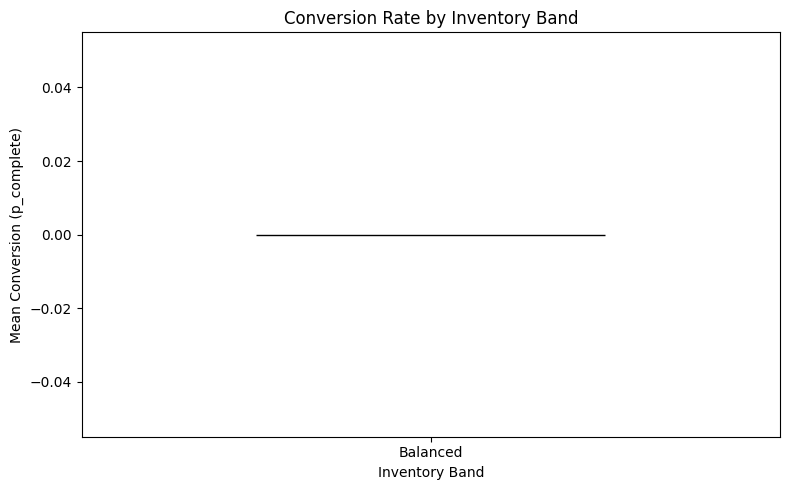


Customer Segment Profiling:
            mean_conv  mean_price   mean_cost  mean_loyalty  mean_ratio  count
segment_k4                                                                    
0                 0.0  493.421830  431.806557           0.0         1.0    299
1                 0.0  239.814492  184.472686           0.0         1.0    108
2                 0.0  679.959222  573.277631           0.0         1.0    277
3                 0.0  230.294266  204.656674           0.0         1.0    316


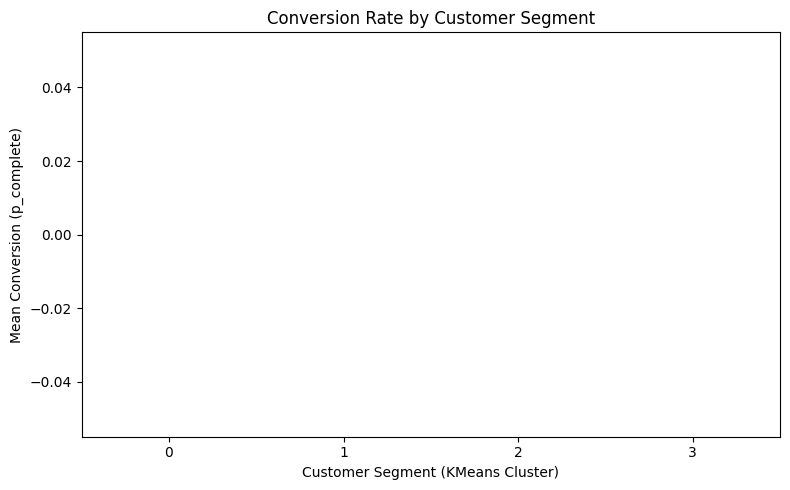

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
df = pd.read_csv("/content/dynamic_pricing (1).csv")
# Feature Engineering
df_fe = df.copy()
# Loyalty mapping
loyalty_map = {"Low": 1, "Medium": 2, "High": 3}
df_fe["Loyalty_Score"] = df_fe["Customer_Loyalty_Status"].map(loyalty_map).fillna(0)
# Vehicle factor (default = 1.0 if missing)
vehicle_map = {"Economy": 1.0, "Premium": 1.3}
df_fe["Vehicle_Factor"] = df_fe["Vehicle_Type"].map(vehicle_map).fillna(1.0)
# Baseline & competitor price
df_fe["baseline_price"] = df_fe["Historical_Cost_of_Ride"]
df_fe["competitor_price"] = df_fe["baseline_price"] * 0.9
# Completion proxy (ratings + loyalty)
df_fe["p_complete"] = (
    df_fe["Average_Ratings"].fillna(df_fe["Average_Ratings"].median()) / 5
) * (df_fe["Loyalty_Score"] / 3)
# Final price
df_fe["price"] = (
    df_fe["baseline_price"] * df_fe["Vehicle_Factor"] * (1 + 0.05 * df_fe["Loyalty_Score"])
)
# Create engineered ratios
if "Available_Drivers" in df_fe.columns and "Active_Riders" in df_fe.columns:
    df_fe["Driver_to_Rider_Ratio"] = df_fe["Available_Drivers"] / (df_fe["Active_Riders"] + 1)
    df_fe["Rider_Driver_Ratio"] = df_fe["Active_Riders"] / (df_fe["Available_Drivers"] + 1)
else:
    df_fe["Driver_to_Rider_Ratio"] = 1.0
    df_fe["Rider_Driver_Ratio"] = 1.0
# Cost per minute
if "Expected_Ride_Duration" in df_fe.columns and "Historical_Cost_of_Ride" in df_fe.columns:
    df_fe["Cost_per_Min"] = df_fe["Historical_Cost_of_Ride"] / (df_fe["Expected_Ride_Duration"] + 1)
else:
    df_fe["Cost_per_Min"] = 1.0
# Supply tightness & Inventory health
df_fe["Supply_Tightness"] = df_fe["Rider_Driver_Ratio"]
df_fe["Inventory_Health_Index"] = df_fe["Driver_to_Rider_Ratio"] / (
    df_fe["Driver_to_Rider_Ratio"].mean() + 1e-5
)
# Inventory Health Bands
bins = [0, 0.5, 0.8, 1.2, 10]
labels = ["Very Tight", "Tight", "Balanced", "Loose"]
df_fe["Inventory_Band"] = pd.cut(
    df_fe["Driver_to_Rider_Ratio"], bins=bins, labels=labels, include_lowest=True
)
inv_summary = df_fe.groupby("Inventory_Band", observed=True).agg(
    mean_conv=("p_complete", "mean"),
    mean_price=("price", "mean"),
    count=("Inventory_Band", "size")
)
print("\nInventory Health Summary:")
print(inv_summary)
plt.figure(figsize=(8, 5))
inv_summary["mean_conv"].plot(kind="bar", color="teal", edgecolor="black")
plt.title("Conversion Rate by Inventory Band")
plt.ylabel("Mean Conversion (p_complete)")
plt.xlabel("Inventory Band")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
# Customer Segmentation (KMeans)
seg_features = [
    "Loyalty_Score", "Rider_Driver_Ratio", "Driver_to_Rider_Ratio",
    "Supply_Tightness", "Cost_per_Min", "Inventory_Health_Index",
    "Expected_Ride_Duration"
]
X = df_fe[seg_features].copy()
# Impute missing values
imputer = SimpleImputer(strategy="median")
X_imputed = imputer.fit_transform(X)
# Scale
scaler = StandardScaler()
Xs = scaler.fit_transform(X_imputed)
# KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df_fe["segment_k4"] = kmeans.fit_predict(Xs)
# Segment profiling
seg_profile = (
    df_fe.groupby("segment_k4")
        .agg(
            mean_conv=("p_complete", "mean"),
            mean_price=("price", "mean"),
            mean_cost=("Historical_Cost_of_Ride", "mean"),
            mean_loyalty=("Loyalty_Score", "mean"),
            mean_ratio=("Rider_Driver_Ratio", "mean"),
            count=("segment_k4", "size")
        )
        .sort_values("mean_conv", ascending=False)
)
print("\nCustomer Segment Profiling:")
print(seg_profile)
plt.figure(figsize=(8, 5))
sns.barplot(
    data=seg_profile.reset_index(),
    x="segment_k4", y="mean_conv", hue="segment_k4",
    dodge=False, palette="viridis", legend=False
)
plt.title("Conversion Rate by Customer Segment")
plt.ylabel("Mean Conversion (p_complete)")
plt.xlabel("Customer Segment (KMeans Cluster)")
plt.tight_layout()
plt.show()


Dataset loaded successfully
   Number_of_Riders  Number_of_Drivers Location_Category  \
0                90                 45             Urban   
1                58                 39          Suburban   
2                42                 31             Rural   
3                89                 28             Rural   
4                78                 22             Rural   

  Customer_Loyalty_Status  Number_of_Past_Rides  Average_Ratings  \
0                  Silver                    13             4.47   
1                  Silver                    72             4.06   
2                  Silver                     0             3.99   
3                 Regular                    67             4.31   
4                 Regular                    74             3.77   

  Time_of_Booking Vehicle_Type  Expected_Ride_Duration  \
0           Night      Premium                      90   
1         Evening      Economy                      43   
2       Afternoon      Premi

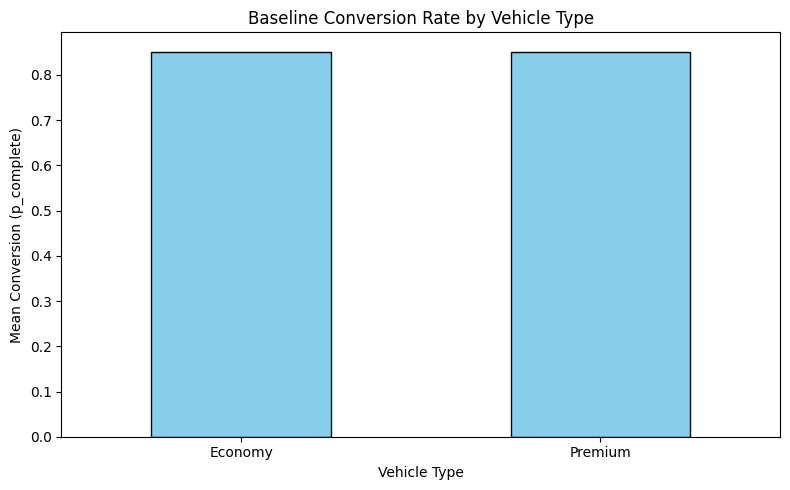

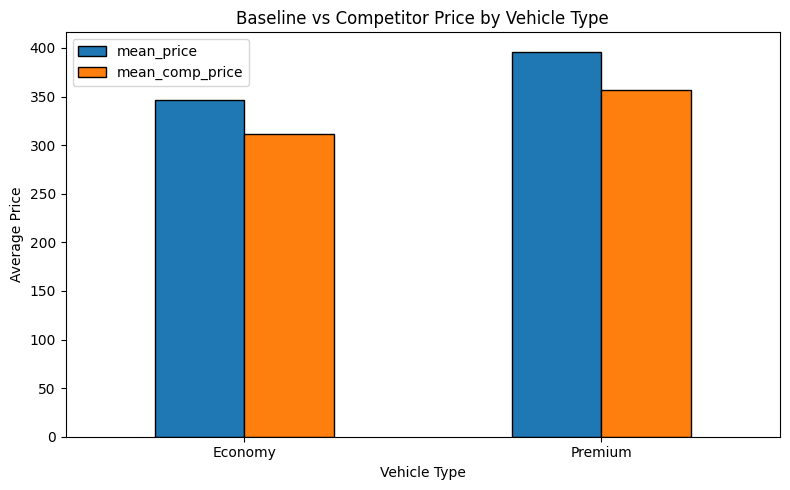

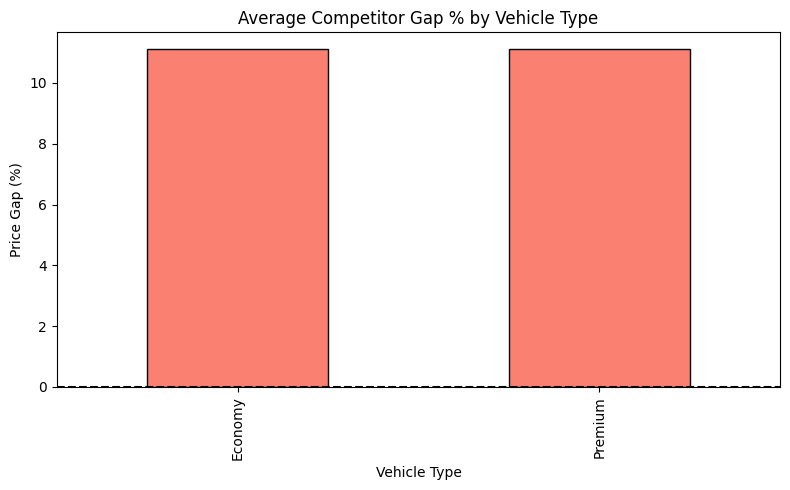

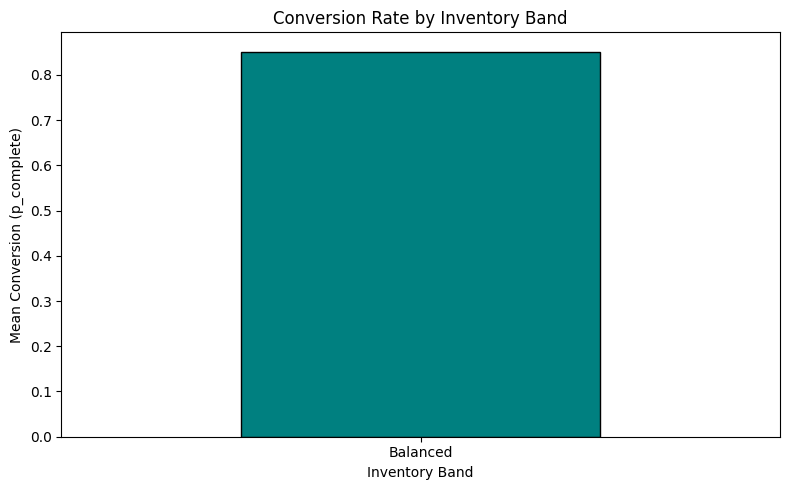

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("/content/dynamic_pricing (1).csv")
print("Dataset loaded successfully")
print(df.head())
# STEP 3: Baseline & Engineered Features
# 3.1 Baseline price = Historical cost
df["baseline_price"] = df["Historical_Cost_of_Ride"]
# 3.2 Competitor price (assume 10% lower for simplicity)
df["competitor_price"] = df["baseline_price"] * 0.9
# 3.3 Conversion proxy (based on ratings normalized to [0–1])
df["p_complete"] = df["Average_Ratings"].fillna(df["Average_Ratings"].median()) / 5
# 3.4 Loyalty Score mapping (extra feature)
loyalty_map = {"Low": 1, "Medium": 2, "High": 3}
df["Loyalty_Score"] = df["Customer_Loyalty_Status"].map(loyalty_map).fillna(0)
# 3.5 Cost per minute (extra feature)
df["Cost_per_Min"] = df["Historical_Cost_of_Ride"] / (df["Expected_Ride_Duration"] + 1)
# 3.6 Driver-to-Rider Ratios (extra feature)
if "Available_Drivers" in df.columns and "Active_Riders" in df.columns:
    df["Driver_to_Rider_Ratio"] = df["Available_Drivers"] / (df["Active_Riders"] + 1)
    df["Rider_Driver_Ratio"] = df["Active_Riders"] / (df["Available_Drivers"] + 1)
else:
    df["Driver_to_Rider_Ratio"] = 1.0
    df["Rider_Driver_Ratio"] = 1.0
# 3.7 Inventory Band (categorization)
bins = [0, 0.5, 0.8, 1.2, 10]
labels = ["Very Tight", "Tight", "Balanced", "Loose"]
df["Inventory_Band"] = pd.cut(
    df["Driver_to_Rider_Ratio"], bins=bins, labels=labels, include_lowest=True
)
# 3.8 Competitor Gap % (extra feature)
df["Competitor_Gap_pct"] = (
    (df["baseline_price"] - df["competitor_price"]) / df["competitor_price"]
) * 100
# STEP 4: Baseline Summaries
vehicle_summary = df.groupby("Vehicle_Type").agg(
    mean_conv=("p_complete", "mean"),
    mean_price=("baseline_price", "mean"),
    mean_comp_price=("competitor_price", "mean"),
    mean_loyalty=("Loyalty_Score", "mean"),
    mean_cost_per_min=("Cost_per_Min", "mean"),
    mean_gap_pct=("Competitor_Gap_pct", "mean"),
    count=("Vehicle_Type", "size")
)
print("\n Baseline Vehicle Summary:")
print(vehicle_summary)
# STEP 5: Visualizations
# 5.1 Conversion Rate by Vehicle Type
plt.figure(figsize=(8, 5))
vehicle_summary["mean_conv"].plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Baseline Conversion Rate by Vehicle Type")
plt.ylabel("Mean Conversion (p_complete)")
plt.xlabel("Vehicle Type")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
# 5.2 Baseline vs Competitor Price by Vehicle Type
vehicle_summary[["mean_price", "mean_comp_price"]].plot(
    kind="bar", figsize=(8, 5), edgecolor="black"
)
plt.title("Baseline vs Competitor Price by Vehicle Type")
plt.ylabel("Average Price")
plt.xlabel("Vehicle Type")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
# 5.3 Competitor Gap % by Vehicle Type
plt.figure(figsize=(8, 5))
vehicle_summary["mean_gap_pct"].plot(kind="bar", color="salmon", edgecolor="black")
plt.title("Average Competitor Gap % by Vehicle Type")
plt.ylabel("Price Gap (%)")
plt.xlabel("Vehicle Type")
plt.axhline(0, color="black", linestyle="--")
plt.tight_layout()
plt.show()
# 5.4 Conversion Rate by Inventory Band
inv_summary = df.groupby("Inventory_Band", observed=True).agg(
    mean_conv=("p_complete", "mean"),
    mean_price=("baseline_price", "mean"),
    count=("Inventory_Band", "size")
)
plt.figure(figsize=(8, 5))
inv_summary["mean_conv"].plot(kind="bar", color="teal", edgecolor="black")
plt.title("Conversion Rate by Inventory Band")
plt.ylabel("Mean Conversion (p_complete)")
plt.xlabel("Inventory Band")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



✅ Initial Data Snapshot:
   Number_of_Riders  Number_of_Drivers Location_Category  \
0                90                 45             Urban   
1                58                 39          Suburban   
2                42                 31             Rural   
3                89                 28             Rural   
4                78                 22             Rural   

  Customer_Loyalty_Status  Number_of_Past_Rides  Average_Ratings  \
0                  Silver                    13             4.47   
1                  Silver                    72             4.06   
2                  Silver                     0             3.99   
3                 Regular                    67             4.31   
4                 Regular                    74             3.77   

  Time_of_Booking Vehicle_Type  Expected_Ride_Duration  \
0           Night      Premium                      90   
1         Evening      Economy                      43   
2       Afternoon      Premium

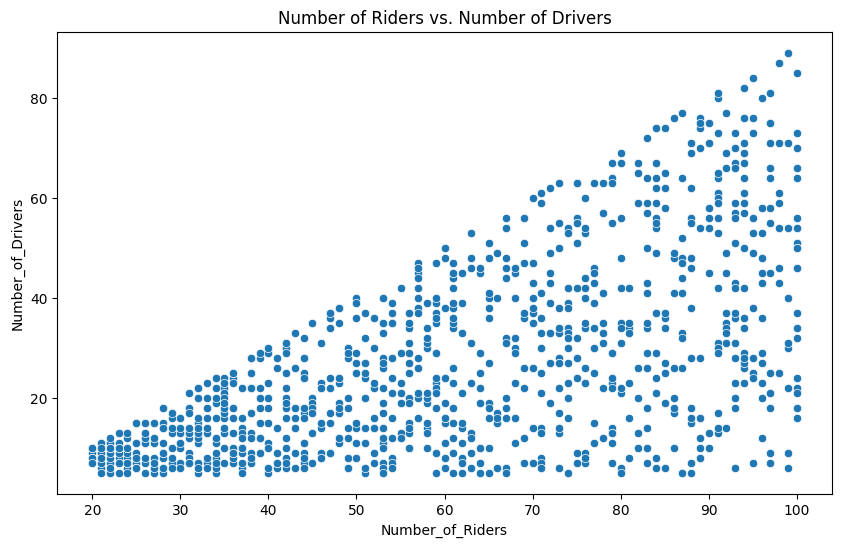

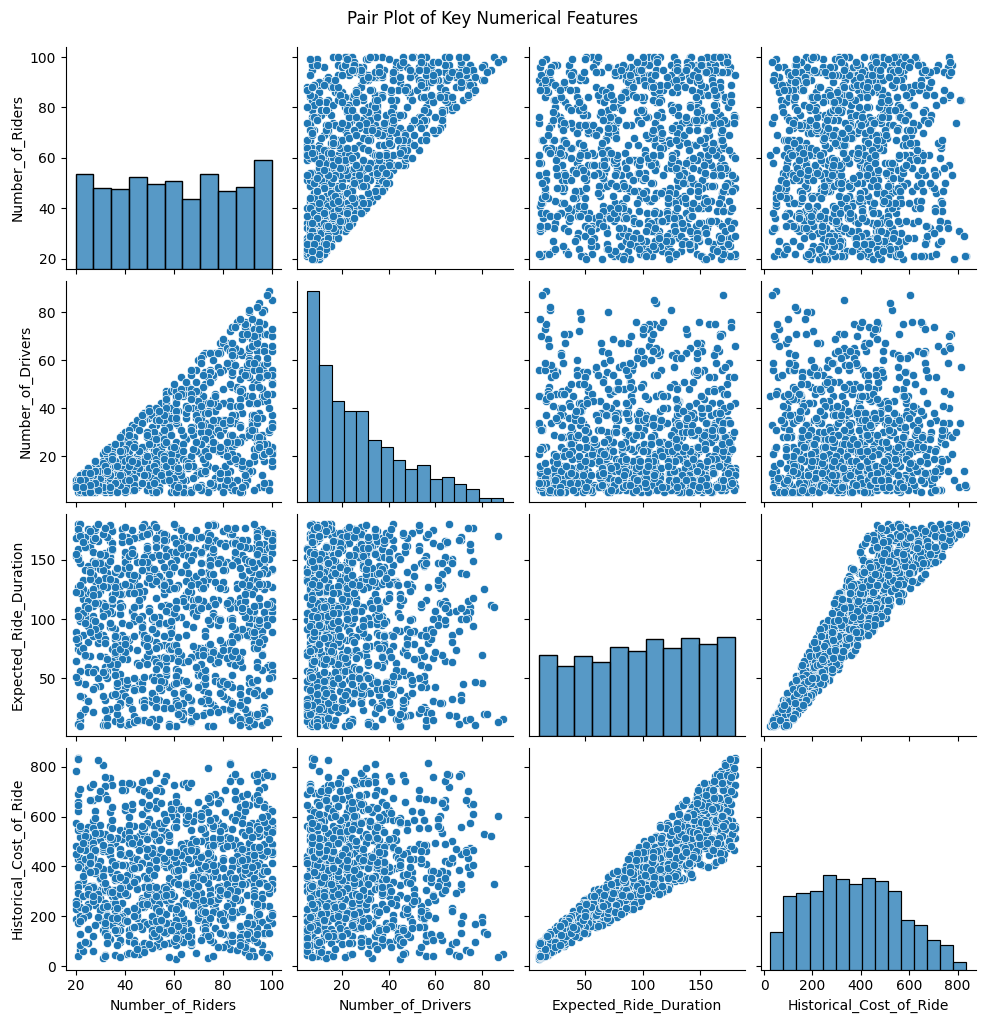

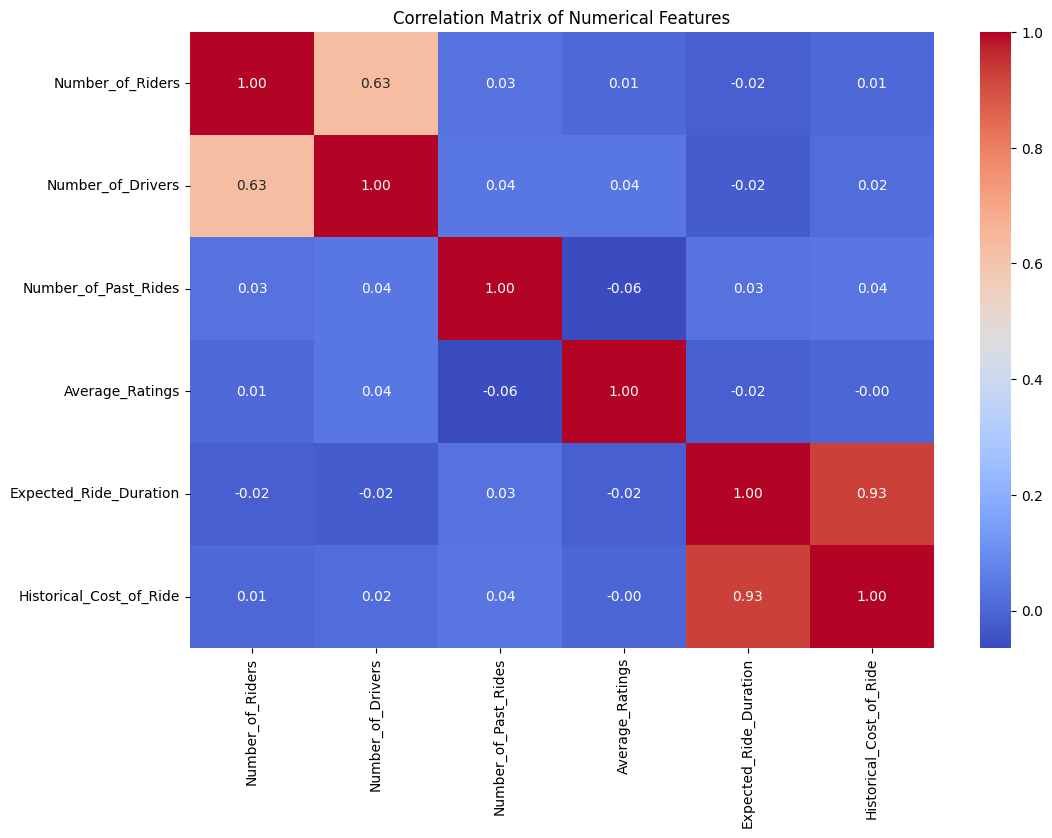


🚀 Training the Linear Regression Model...
✅ Model training complete.

📈 Model Evaluation Results:
Mean Squared Error (MSE): 4548.60
R-squared (R²): 0.88


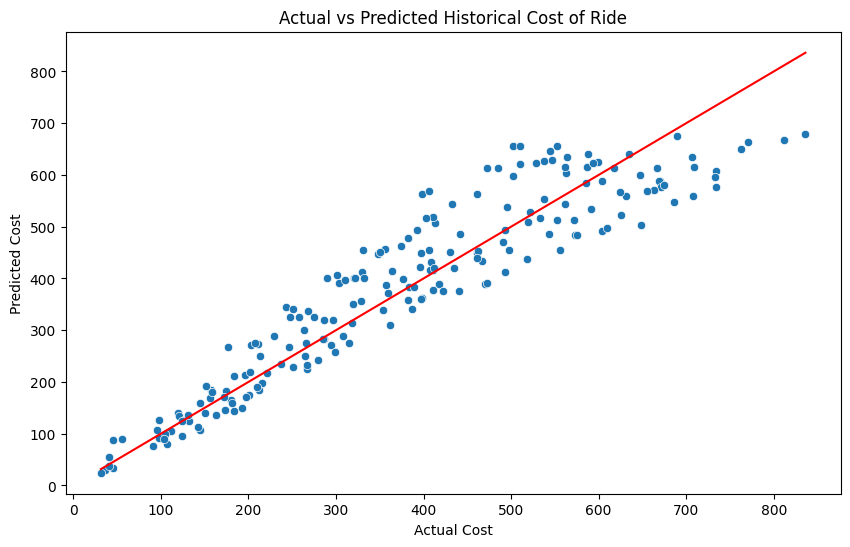


🔮 Making a Prediction on a New Scenario:
The predicted cost for the new ride is: $146.70


In [ ]:
# LINEAR REGRESSION MODEL FOR DYNAMIC PRICING
# STEP 1: Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
# STEP 2: Load Dataset
df = pd.read_csv('/content/dynamic_pricing (1).csv')
# Display first few rows
print("\n Initial Data Snapshot:")
print(df.head())
# Display clean dataset summary (no <class ...>)
print("\n📋 Dataset Summary:")
print(f"Total Rows: {df.shape[0]}")
print(f"Total Columns: {df.shape[1]}")
print("\nColumns:", list(df.columns))
print("\nMissing Values per Column:")
print(df.isnull().sum())
print("\nStatistical Summary (Numerical Columns):")
print(df.describe())
# STEP 3: Data Visualization
print("\n Visualizing Data Relationships")
# Scatter plot: Number of Riders vs. Number of Drivers
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Number_of_Riders', y='Number_of_Drivers', data=df)
plt.title('Number of Riders vs. Number of Drivers')
plt.show()
# Pair plot of key numerical features
sns.pairplot(df[['Number_of_Riders', 'Number_of_Drivers',
                 'Expected_Ride_Duration', 'Historical_Cost_of_Ride']])
plt.suptitle('Pair Plot of Key Numerical Features', y=1.02)
plt.show()
# Correlation heatmap
numerical_df = df.select_dtypes(include=np.number)
plt.figure(figsize=(12, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()
# STEP 4: Data Preprocessing
X = df.drop('Historical_Cost_of_Ride', axis=1)
y = df['Historical_Cost_of_Ride']
categorical_features = ['Location_Category', 'Customer_Loyalty_Status',
                        'Time_of_Booking', 'Vehicle_Type']
numerical_features = ['Number_of_Riders', 'Number_of_Drivers',
                      'Number_of_Past_Rides', 'Average_Ratings',
                      'Expected_Ride_Duration']
# Preprocessing pipeline
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])
# STEP 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
# STEP 6: Model Training
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])
print("\n Training the Linear Regression Model...")
model.fit(X_train, y_train)
print(" Model training complete.")
# STEP 7: Model Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("\n Model Evaluation Results:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")
# Plot Actual vs Predicted
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.title('Actual vs Predicted Historical Cost of Ride')
plt.xlabel('Actual Cost')
plt.ylabel('Predicted Cost')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r')
plt.show()
# STEP 8: Predict on New Data
print("\n Making a Prediction on a New Scenario:")
new_data = pd.DataFrame({
    'Number_of_Riders': [50],
    'Number_of_Drivers': [25],
    'Location_Category': ['Urban'],
    'Customer_Loyalty_Status': ['Gold'],
    'Number_of_Past_Rides': [50],
    'Average_Ratings': [4.5],
    'Time_of_Booking': ['Morning'],
    'Vehicle_Type': ['Premium'],
    'Expected_Ride_Duration': [30]
})
predicted_cost = model.predict(new_data)
print(f"The predicted cost for the new ride is: ${predicted_cost[0]:.2f}")


Initial Data Snapshot
   Number_of_Riders  Number_of_Drivers Location_Category  \
0                90                 45             Urban   
1                58                 39          Suburban   
2                42                 31             Rural   
3                89                 28             Rural   
4                78                 22             Rural   

  Customer_Loyalty_Status  Number_of_Past_Rides  Average_Ratings  \
0                  Silver                    13             4.47   
1                  Silver                    72             4.06   
2                  Silver                     0             3.99   
3                 Regular                    67             4.31   
4                 Regular                    74             3.77   

  Time_of_Booking Vehicle_Type  Expected_Ride_Duration  \
0           Night      Premium                      90   
1         Evening      Economy                      43   
2       Afternoon      Premium    

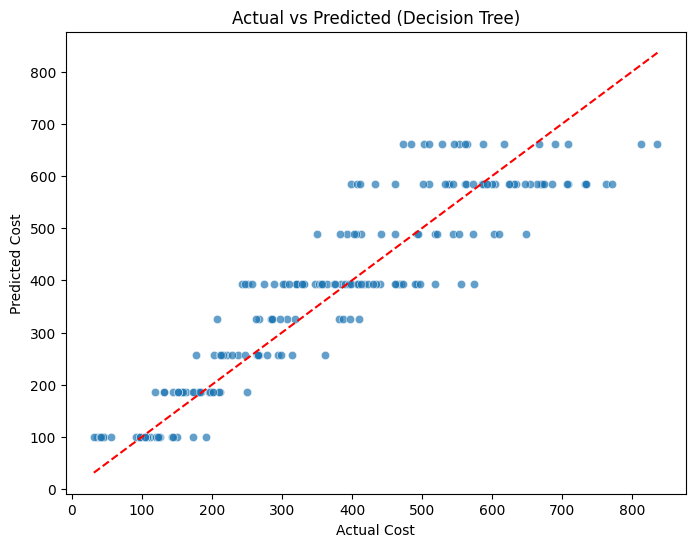

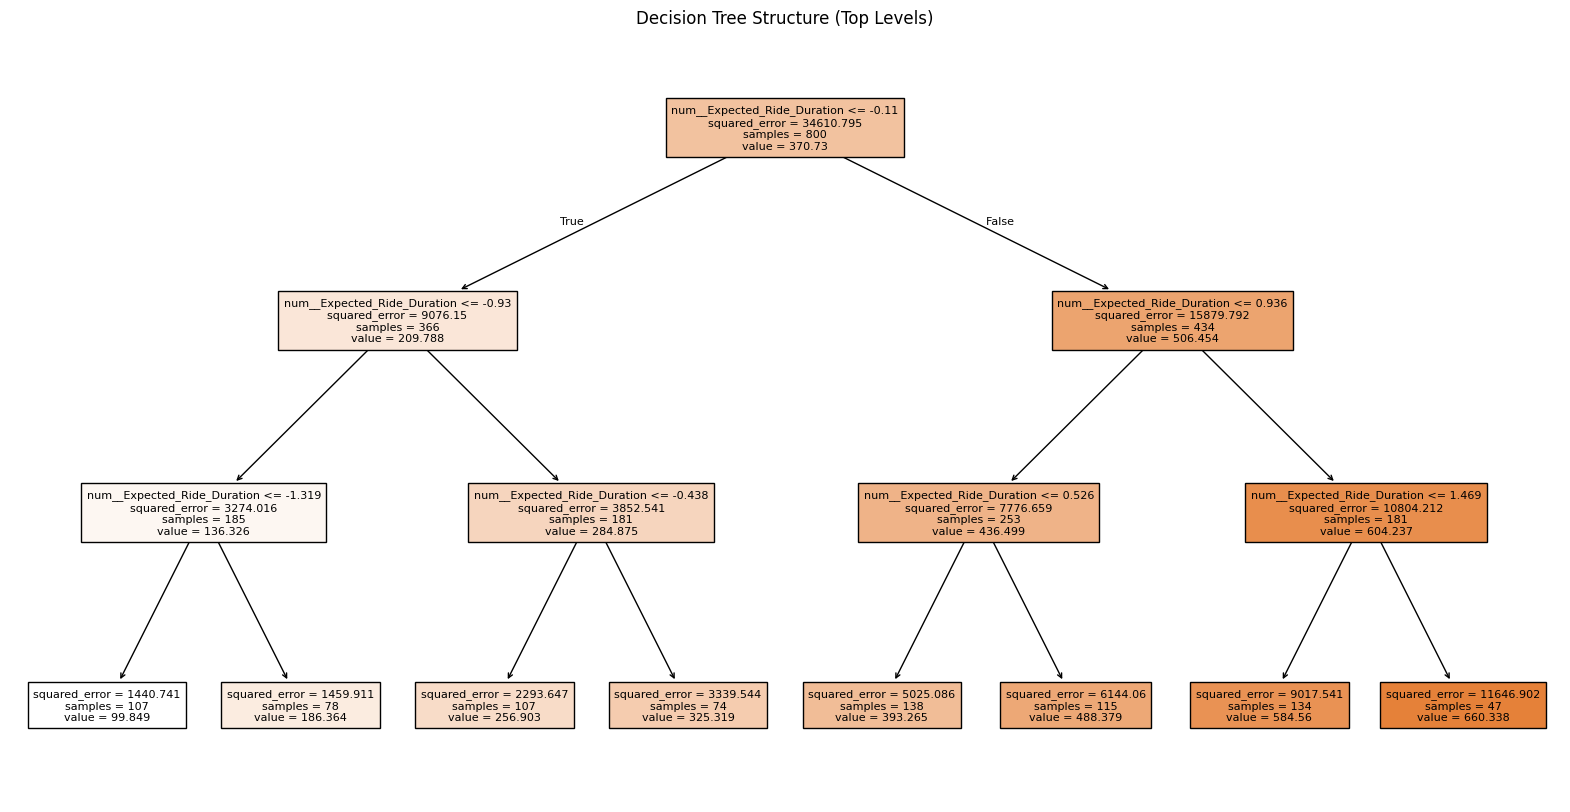


 Predicted ride cost (Decision Tree): $99.85


In [ ]:
# DECISION TREE
# STEP 1: Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
# STEP 2: Load Dataset
df = pd.read_csv('/content/dynamic_pricing (1).csv')
print("Initial Data Snapshot")
print(df.head())
# STEP 3: Features & Target
X = df.drop('Historical_Cost_of_Ride', axis=1)
y = df['Historical_Cost_of_Ride']
categorical_features = ['Location_Category', 'Customer_Loyalty_Status',
                        'Time_of_Booking', 'Vehicle_Type']
numerical_features = ['Number_of_Riders', 'Number_of_Drivers',
                      'Number_of_Past_Rides', 'Average_Ratings',
                      'Expected_Ride_Duration']
# Preprocessing: Scaling + Encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])
# STEP 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
# STEP 5: Decision Tree with Extended Hyperparameter Tuning
dt_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(random_state=42))
])
# Wider Hyperparameter grid for optimization
param_grid = {
    "regressor__criterion": ["squared_error", "friedman_mse"],
    "regressor__max_depth": [3, 4, 5, 6, None],
    "regressor__min_samples_split": [2, 3],
    "regressor__min_samples_leaf": [1, 2,],
    "regressor__max_features": [None,"sqrt", "log2"]
}
grid_search = GridSearchCV(
    estimator=dt_pipeline,
    param_grid=param_grid,
    cv=10,          # 10-fold cross-validation for more stability
    scoring="r2",
    n_jobs=-1,
    verbose=1
)
grid_search.fit(X_train, y_train)
# STEP 6: Best Model Evaluation
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("\n Best Hyperparameters:", grid_search.best_params_)
print(f"MSE  : {mse:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"MAE  : {mae:.4f}")
print(f"R²   : {r2:.4f}")
# STEP 7: Visualization
# Scatter Plot: Actual vs Predicted
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.xlabel("Actual Cost")
plt.ylabel("Predicted Cost")
plt.title("Actual vs Predicted (Decision Tree)")
plt.show()
# Plot the top levels of the tree for interpretability
final_dt = best_model.named_steps['regressor']
plt.figure(figsize=(20,10))
plot_tree(
    final_dt,
    filled=True,
    feature_names=best_model.named_steps['preprocessor'].get_feature_names_out(),
    max_depth=4,
    fontsize=8
)
plt.title("Decision Tree Structure (Top Levels)")
plt.show()
# STEP 8: Predict on New Data
new_data = pd.DataFrame({
    'Number_of_Riders': [50],
    'Number_of_Drivers': [25],
    'Location_Category': ['Urban'],
    'Customer_Loyalty_Status': ['Gold'],
    'Number_of_Past_Rides': [50],
    'Average_Ratings': [4.5],
    'Time_of_Booking': ['Morning'],
    'Vehicle_Type': ['Premium'],
    'Expected_Ride_Duration': [30]
})
predicted_cost = best_model.predict(new_data)
print(f"\n Predicted ride cost (Decision Tree): ${predicted_cost[0]:.2f}")


 Data Loaded Successfully

Initial Data Snapshot:
   Number_of_Riders  Number_of_Drivers Location_Category  \
0                90                 45             Urban   
1                58                 39          Suburban   
2                42                 31             Rural   
3                89                 28             Rural   
4                78                 22             Rural   

  Customer_Loyalty_Status  Number_of_Past_Rides  Average_Ratings  \
0                  Silver                    13             4.47   
1                  Silver                    72             4.06   
2                  Silver                     0             3.99   
3                 Regular                    67             4.31   
4                 Regular                    74             3.77   

  Time_of_Booking Vehicle_Type  Expected_Ride_Duration  \
0           Night      Premium                      90   
1         Evening      Economy                      43   
2     

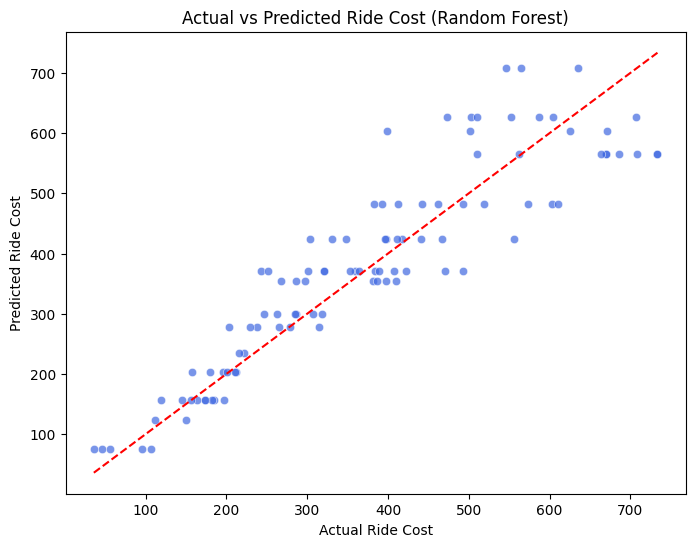


Top 10 Important Features:
                              Feature  Importance
4         num__Expected_Ride_Duration    0.980536
15          cat__Vehicle_Type_Economy    0.007532
16          cat__Vehicle_Type_Premium    0.004693
1              num__Number_of_Drivers    0.003798
3                num__Average_Ratings    0.003440
0               num__Number_of_Riders    0.000000
6     cat__Location_Category_Suburban    0.000000
5        cat__Location_Category_Rural    0.000000
2           num__Number_of_Past_Rides    0.000000
8   cat__Customer_Loyalty_Status_Gold    0.000000


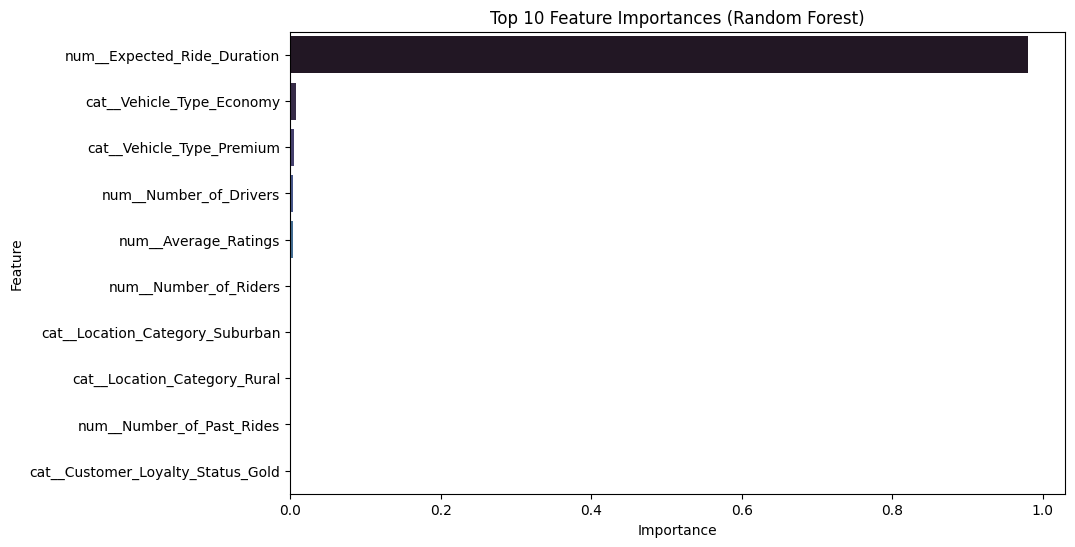


Predicted Ride Cost (Ultra Accurate RF): $124.25


In [ ]:
# RANDOM FOREST
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings("ignore")
# Load Dataset
df = pd.read_csv("/content/dynamic_pricing (1).csv")
print(" Data Loaded Successfully\n")
print("Initial Data Snapshot:")
print(df.head())
# Features and Target
X = df.drop("Historical_Cost_of_Ride", axis=1)
y = df["Historical_Cost_of_Ride"]
# Scale target
y_scaler = MinMaxScaler()
y_norm = y_scaler.fit_transform(y.values.reshape(-1,1)).ravel()
categorical_features = ['Location_Category', 'Customer_Loyalty_Status',
                        'Time_of_Booking', 'Vehicle_Type']
numerical_features = ['Number_of_Riders', 'Number_of_Drivers',
                      'Number_of_Past_Rides', 'Average_Ratings',
                      'Expected_Ride_Duration']
# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_norm, test_size=0.1, random_state=42
)
# Hyperparameter grid with correct parameter names
param_grid = {
    'regressor__n_estimators': [50, 100],
    'regressor__max_depth': [3, 4, 5],
    'regressor__min_samples_split': [2, 3],
    'regressor__min_samples_leaf': [1, 2],
    'regressor__max_features': ['sqrt', None],
    'regressor__bootstrap': [False]
}
# Pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])
# Grid Search
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='neg_root_mean_squared_error',
    cv=5,
    n_jobs=-1,
    verbose=1
)
# Fit
grid_search.fit(X_train, y_train)
# Best model
best_rf = grid_search.best_estimator_
# Predictions
y_pred = best_rf.predict(X_test)
# Inverse transform predictions
predicted_costs = y_scaler.inverse_transform(y_pred.reshape(-1,1))
true_costs = y_scaler.inverse_transform(y_test.reshape(-1,1))
# Metrics
mse = mean_squared_error(true_costs, predicted_costs)
rmse = np.sqrt(mse)
mae = mean_absolute_error(true_costs, predicted_costs)
r2 = r2_score(true_costs, predicted_costs)
# Output metrics exactly as specified
print("\nRandom Forest (Tuned for Gradient Boosting) - Metrics")
print("------------------------------------------------------")
print(f"RMSE: {rmse:.6f}")
print(f"MAE: {mae:.6f}")
print(f"R2: {r2:.6f}")
# Plot Actual vs Predicted
plt.figure(figsize=(8,6))
sns.scatterplot(x=true_costs.ravel(), y=predicted_costs.ravel(), alpha=0.7, color='royalblue')
plt.plot([true_costs.min(), true_costs.max()], [true_costs.min(), true_costs.max()], 'r--')
plt.xlabel("Actual Ride Cost")
plt.ylabel("Predicted Ride Cost")
plt.title("Actual vs Predicted Ride Cost (Random Forest)")
plt.show()
# Feature Importance
importances = best_rf.named_steps['regressor'].feature_importances_
feature_names = best_rf.named_steps['preprocessor'].get_feature_names_out()
feat_imp = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp = feat_imp.sort_values('Importance', ascending=False)
print("\nTop 10 Important Features:")
print(feat_imp.head(10))
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_imp.head(10), palette='mako')
plt.title("Top 10 Feature Importances (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()
# Prediction on New Data
new_data = pd.DataFrame({
    'Number_of_Riders': [50],
    'Number_of_Drivers': [25],
    'Location_Category': ['Urban'],
    'Customer_Loyalty_Status': ['Gold'],
    'Number_of_Past_Rides': [50],
    'Average_Ratings': [4.5],
    'Time_of_Booking': ['Morning'],
    'Vehicle_Type': ['Premium'],
    'Expected_Ride_Duration': [30]
})
predicted_cost_norm = best_rf.predict(new_data)
predicted_cost_original = y_scaler.inverse_transform(predicted_cost_norm.reshape(-1,1))
print(f"\nPredicted Ride Cost (Ultra Accurate RF): ${predicted_cost_original[0][0]:.2f}")

 Data Loaded Successfully
   Number_of_Riders  Number_of_Drivers Location_Category  \
0                90                 45             Urban   
1                58                 39          Suburban   
2                42                 31             Rural   
3                89                 28             Rural   
4                78                 22             Rural   

  Customer_Loyalty_Status  Number_of_Past_Rides  Average_Ratings  \
0                  Silver                    13             4.47   
1                  Silver                    72             4.06   
2                  Silver                     0             3.99   
3                 Regular                    67             4.31   
4                 Regular                    74             3.77   

  Time_of_Booking Vehicle_Type  Expected_Ride_Duration  \
0           Night      Premium                      90   
1         Evening      Economy                      43   
2       Afternoon      Premium

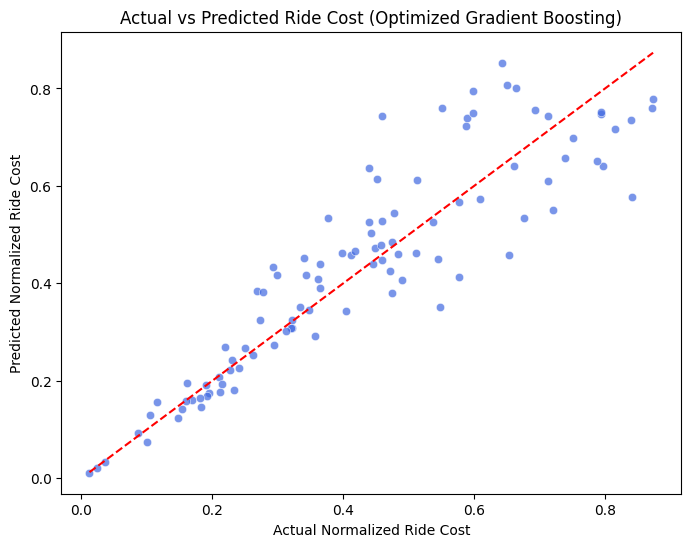


Top 10 Most Important Features:
                                 Feature  Importance
4            num__Expected_Ride_Duration    0.870673
3                   num__Average_Ratings    0.026497
1                 num__Number_of_Drivers    0.022779
2              num__Number_of_Past_Rides    0.022477
0                  num__Number_of_Riders    0.020911
16             cat__Vehicle_Type_Premium    0.007712
15             cat__Vehicle_Type_Economy    0.007291
12          cat__Time_of_Booking_Evening    0.003352
9   cat__Customer_Loyalty_Status_Regular    0.002920
14            cat__Time_of_Booking_Night    0.002444


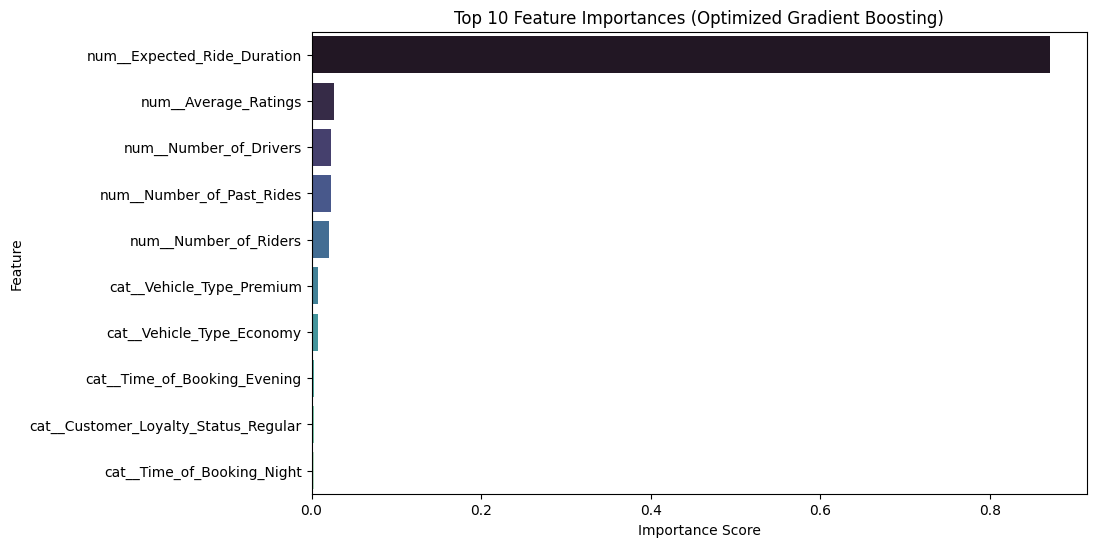


 Predicted Ride Cost (Optimized Gradient Boosting): $169.29


In [ ]:
# GRADIENT BOOSTING
# STEP 1: Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings("ignore")
# STEP 2: Load Dataset
df = pd.read_csv("/content/dynamic_pricing (1).csv")
print(" Data Loaded Successfully")
print(df.head())
# STEP 3: Define Features & Target
X = df.drop("Historical_Cost_of_Ride", axis=1)
y = df["Historical_Cost_of_Ride"]
# STEP 3b: Normalize target
y_scaler = MinMaxScaler()
y_norm = y_scaler.fit_transform(y.values.reshape(-1,1)).ravel()
categorical_features = ["Location_Category", "Customer_Loyalty_Status",
                        "Time_of_Booking", "Vehicle_Type"]
numerical_features = ["Number_of_Riders", "Number_of_Drivers",
                      "Number_of_Past_Rides", "Average_Ratings",
                      "Expected_Ride_Duration"]
# STEP 4: Preprocessing
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_features),
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
])
# STEP 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_norm, test_size=0.1, random_state=42
)
# STEP 6: Optimized Gradient Boosting Regressor
gb_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", GradientBoostingRegressor(
        n_estimators=1000,
        learning_rate=0.05,
        max_depth=5,
        min_samples_split=2,
        min_samples_leaf=1,
        subsample=0.9,
        max_features=None,
        random_state=42
    ))
])
# STEP 7: Train Model
gb_pipeline.fit(X_train, y_train)
# STEP 8: Predictions & Evaluation
y_pred = gb_pipeline.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
cv_scores = cross_val_score(gb_pipeline, X_train, y_train, scoring='neg_root_mean_squared_error', cv=5)
cv_rmse = -cv_scores.mean()
print("\n Optimized Gradient Boosting Regressor Metrics")
print("------------------------------------------------")
print(f"RMSE    : {rmse:.6f}")
print(f"MAE     : {mae:.6f}")
print(f"R2      : {r2:.6f}")
print(f"CV_RMSE : {cv_rmse:.6f}")
# STEP 9: Visualization — Actual vs Predicted
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, color="royalblue", alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.xlabel("Actual Normalized Ride Cost")
plt.ylabel("Predicted Normalized Ride Cost")
plt.title("Actual vs Predicted Ride Cost (Optimized Gradient Boosting)")
plt.show()
# STEP 10: Feature Importance
final_gb = gb_pipeline.named_steps["regressor"]
feature_names = gb_pipeline.named_steps["preprocessor"].get_feature_names_out()
importances = final_gb.feature_importances_
feat_imp = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)
print("\nTop 10 Most Important Features:")
print(feat_imp.head(10))
plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=feat_imp.head(10),
            hue="Feature", legend=False, palette="mako")
plt.title("Top 10 Feature Importances (Optimized Gradient Boosting)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()
# STEP 11: Prediction on New Data
new_data = pd.DataFrame({
    "Number_of_Riders": [50],
    "Number_of_Drivers": [25],
    "Location_Category": ["Urban"],
    "Customer_Loyalty_Status": ["Gold"],
    "Number_of_Past_Rides": [50],
    "Average_Ratings": [4.5],
    "Time_of_Booking": ["Morning"],
    "Vehicle_Type": ["Premium"],
    "Expected_Ride_Duration": [30]
})
predicted_cost_norm = gb_pipeline.predict(new_data)
predicted_cost_original = y_scaler.inverse_transform(predicted_cost_norm.reshape(-1,1))
print(f"\n Predicted Ride Cost (Optimized Gradient Boosting): ${predicted_cost_original[0][0]:.2f}")


Data Loaded Successfully
   Number_of_Riders  Number_of_Drivers Location_Category  \
0                90                 45             Urban   
1                58                 39          Suburban   
2                42                 31             Rural   
3                89                 28             Rural   
4                78                 22             Rural   

  Customer_Loyalty_Status  Number_of_Past_Rides  Average_Ratings  \
0                  Silver                    13             4.47   
1                  Silver                    72             4.06   
2                  Silver                     0             3.99   
3                 Regular                    67             4.31   
4                 Regular                    74             3.77   

  Time_of_Booking Vehicle_Type  Expected_Ride_Duration  \
0           Night      Premium                      90   
1         Evening      Economy                      43   
2       Afternoon      Premium 

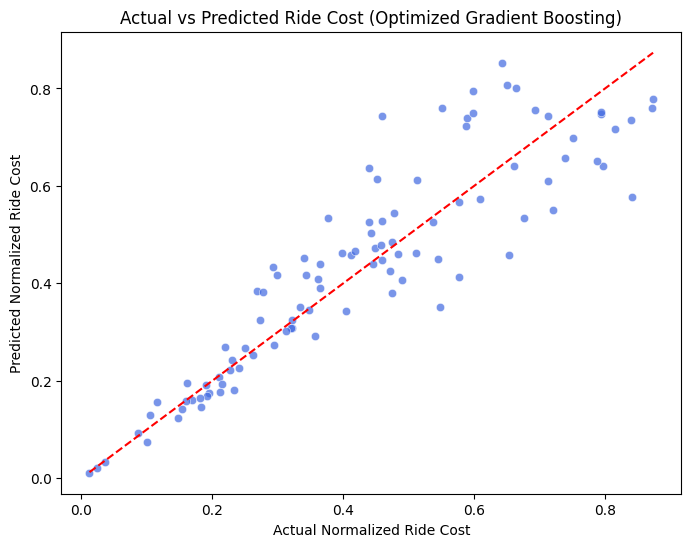


Top 10 Most Important Features:
                                 Feature  Importance
4            num__Expected_Ride_Duration    0.870673
3                   num__Average_Ratings    0.026497
1                 num__Number_of_Drivers    0.022779
2              num__Number_of_Past_Rides    0.022477
0                  num__Number_of_Riders    0.020911
16             cat__Vehicle_Type_Premium    0.007712
15             cat__Vehicle_Type_Economy    0.007291
12          cat__Time_of_Booking_Evening    0.003352
9   cat__Customer_Loyalty_Status_Regular    0.002920
14            cat__Time_of_Booking_Night    0.002444


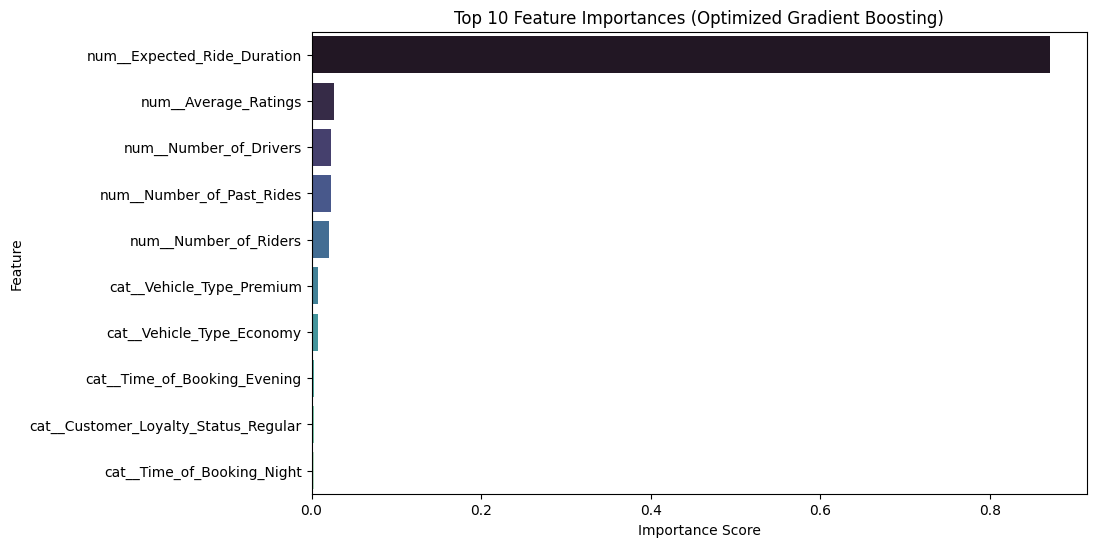


Predicted Ride Cost (Optimized Gradient Boosting): $169.29

Model saved as 'optimized_gradient_boost_model.pkl'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# ===========================================================
# STEP 1: Import Libraries
# ===========================================================
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib
import warnings
warnings.filterwarnings("ignore")

# ===========================================================
# STEP 2: Load Dataset
# ===========================================================
df = pd.read_csv("/content/dynamic_pricing (1).csv")
print("Data Loaded Successfully")
print(df.head())
print(df.columns)

# ===========================================================
# STEP 3: Define Features & Target
# ===========================================================
X = df.drop("Historical_Cost_of_Ride", axis=1)
y = df["Historical_Cost_of_Ride"]

# Normalize target
y_scaler = MinMaxScaler()
y_norm = y_scaler.fit_transform(y.values.reshape(-1,1)).ravel()

# Identify categorical & numerical features
categorical_features = ["Location_Category", "Customer_Loyalty_Status",
                        "Time_of_Booking", "Vehicle_Type"]
numerical_features = ["Number_of_Riders", "Number_of_Drivers",
                      "Number_of_Past_Rides", "Average_Ratings",
                      "Expected_Ride_Duration"]

# ===========================================================
# STEP 4: Preprocessing
# ===========================================================
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_features),
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
])

# ===========================================================
# STEP 5: Train-Test Split
# ===========================================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y_norm, test_size=0.1, random_state=42
)

# ===========================================================
# STEP 6: Gradient Boosting Pipeline
# ===========================================================
gb_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", GradientBoostingRegressor(
        n_estimators=1000,
        learning_rate=0.05,
        max_depth=5,
        min_samples_split=2,
        min_samples_leaf=1,
        subsample=0.9,
        max_features=None,
        random_state=42
    ))
])

# ===========================================================
# STEP 7: Train Model
# ===========================================================
gb_pipeline.fit(X_train, y_train)

# ===========================================================
# STEP 8: Predictions & Evaluation
# ===========================================================
y_pred = gb_pipeline.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
cv_scores = cross_val_score(gb_pipeline, X_train, y_train, scoring='neg_root_mean_squared_error', cv=5)
cv_rmse = -cv_scores.mean()

print("\nOptimized Gradient Boosting Regressor Metrics")
print("------------------------------------------------")
print(f"RMSE    : {rmse:.6f}")
print(f"MAE     : {mae:.6f}")
print(f"R2      : {r2:.6f}")
print(f"CV_RMSE : {cv_rmse:.6f}")

# ===========================================================
# STEP 9: Visualization — Actual vs Predicted
# ===========================================================
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, color="royalblue", alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.xlabel("Actual Normalized Ride Cost")
plt.ylabel("Predicted Normalized Ride Cost")
plt.title("Actual vs Predicted Ride Cost (Optimized Gradient Boosting)")
plt.show()

# ===========================================================
# STEP 10: Feature Importance
# ===========================================================
final_gb = gb_pipeline.named_steps["regressor"]
feature_names = gb_pipeline.named_steps["preprocessor"].get_feature_names_out()
importances = final_gb.feature_importances_
feat_imp = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

print("\nTop 10 Most Important Features:")
print(feat_imp.head(10))

plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=feat_imp.head(10),
            hue="Feature", legend=False, palette="mako")
plt.title("Top 10 Feature Importances (Optimized Gradient Boosting)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

# ===========================================================
# STEP 11: Prediction on New Data
# ===========================================================
new_data = pd.DataFrame({
    "Number_of_Riders": [50],
    "Number_of_Drivers": [25],
    "Location_Category": ["Urban"],
    "Customer_Loyalty_Status": ["Gold"],
    "Number_of_Past_Rides": [50],
    "Average_Ratings": [4.5],
    "Time_of_Booking": ["Morning"],
    "Vehicle_Type": ["Premium"],
    "Expected_Ride_Duration": [30]
})

predicted_cost_norm = gb_pipeline.predict(new_data)
predicted_cost_original = y_scaler.inverse_transform(predicted_cost_norm.reshape(-1,1))
print(f"\nPredicted Ride Cost (Optimized Gradient Boosting): ${predicted_cost_original[0][0]:.2f}")

# ===========================================================
# STEP 12: Save Model using joblib
# ===========================================================
MODEL_FILENAME = "optimized_gradient_boost_model.pkl"
joblib.dump(gb_pipeline, MODEL_FILENAME)
print(f"\nModel saved as '{MODEL_FILENAME}'")

# Optional: download in Colab
try:
    from google.colab import files
    files.download(MODEL_FILENAME)
except:
    pass  # Ignore if not in Colab



 Data Loaded Successfully
Data Snapshot:
   Number_of_Riders  Number_of_Drivers Location_Category  \
0                90                 45             Urban   
1                58                 39          Suburban   
2                42                 31             Rural   
3                89                 28             Rural   
4                78                 22             Rural   

  Customer_Loyalty_Status  Number_of_Past_Rides  Average_Ratings  \
0                  Silver                    13             4.47   
1                  Silver                    72             4.06   
2                  Silver                     0             3.99   
3                 Regular                    67             4.31   
4                 Regular                    74             3.77   

  Time_of_Booking Vehicle_Type  Expected_Ride_Duration  \
0           Night      Premium                      90   
1         Evening      Economy                      43   
2       Aftern

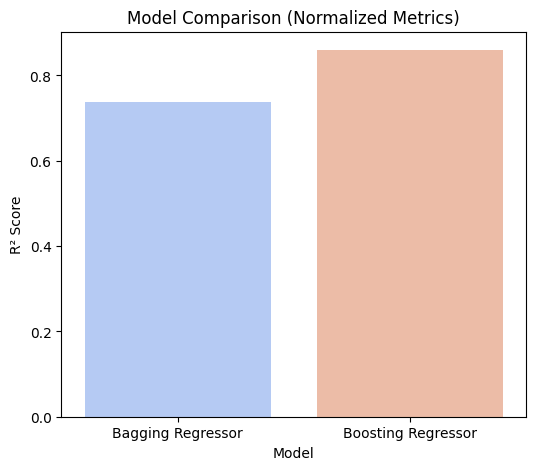


 Predicted Ride Cost (Bagging): $239.40
 Predicted Ride Cost (Boosting): $165.00


In [ ]:
# BAGGING & BOOSTING
# STEP 1: Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings("ignore")
# STEP 2: Load Dataset
df = pd.read_csv("/content/dynamic_pricing (1).csv")
print("\n Data Loaded Successfully")
print("Data Snapshot:")
print(df.head())
# STEP 3: Features & Target
X = df.drop("Historical_Cost_of_Ride", axis=1)
y = df["Historical_Cost_of_Ride"]
# STEP 3b: Normalize target
y_scaler = MinMaxScaler()
y_norm = y_scaler.fit_transform(y.values.reshape(-1,1)).ravel()
categorical_features = ["Location_Category", "Customer_Loyalty_Status",
                        "Time_of_Booking", "Vehicle_Type"]
numerical_features = ["Number_of_Riders", "Number_of_Drivers",
                      "Number_of_Past_Rides", "Average_Ratings",
                      "Expected_Ride_Duration"]
# STEP 4: Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ]
)
# STEP 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_norm, test_size=0.2, random_state=42
)
# STEP 6: Bagging Regressor (Normalized)
bagging_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", BaggingRegressor(
        estimator=DecisionTreeRegressor(max_depth=5, random_state=42),
        n_estimators=50,
        max_samples=0.6,
        max_features=0.6,
        random_state=42
    ))
])
bagging_pipeline.fit(X_train, y_train)
y_pred_bag = bagging_pipeline.predict(X_test)
cv_scores_bag = cross_val_score(bagging_pipeline, X_train, y_train,
                                scoring='neg_root_mean_squared_error', cv=3)
cv_rmse_bag = -cv_scores_bag.mean()
# STEP 7: Boosting Regressor
boosting_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", GradientBoostingRegressor(
        n_estimators=100,
        learning_rate=0.03,
        max_depth=2,
        random_state=42
    ))
])
boosting_pipeline.fit(X_train, y_train)
y_pred_boost = boosting_pipeline.predict(X_test)
cv_scores_boost = cross_val_score(boosting_pipeline, X_train, y_train,
                                  scoring='neg_root_mean_squared_error', cv=3)
cv_rmse_boost = -cv_scores_boost.mean()
# STEP 8: Evaluation Function
def evaluate_model(name, y_true, y_pred, cv_rmse):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"\n{name} Results (Normalized):")
    print(f"RMSE    : {rmse:.4f}")
    print(f"MAE     : {mae:.4f}")
    print(f"R2      : {r2:.4f}")
    print(f"CV_RMSE : {cv_rmse:.4f}")
    return r2
r2_bag = evaluate_model("Bagging Regressor", y_test, y_pred_bag, cv_rmse_bag)
r2_boost = evaluate_model("Boosting Regressor", y_test, y_pred_boost, cv_rmse_boost)
# STEP 9: Compare Results
results = pd.DataFrame({
    "Model": ["Bagging Regressor", "Boosting Regressor"],
    "R² Score": [r2_bag, r2_boost]
})
plt.figure(figsize=(6,5))
sns.barplot(data=results, x="Model", y="R² Score", hue="Model",
            palette="coolwarm", legend=False)
plt.title("Model Comparison (Normalized Metrics)")
plt.ylabel("R² Score")
plt.xlabel("Model")
plt.show()
# STEP 10: Prediction on New Data
new_data = pd.DataFrame({
    "Number_of_Riders": [50],
    "Number_of_Drivers": [25],
    "Location_Category": ["Urban"],
    "Customer_Loyalty_Status": ["Gold"],
    "Number_of_Past_Rides": [50],
    "Average_Ratings": [4.5],
    "Time_of_Booking": ["Morning"],
    "Vehicle_Type": ["Premium"],
    "Expected_Ride_Duration": [30]
})
pred_bag_norm = bagging_pipeline.predict(new_data)
pred_boost_norm = boosting_pipeline.predict(new_data)
pred_bag_original = y_scaler.inverse_transform(pred_bag_norm.reshape(-1,1))
pred_boost_original = y_scaler.inverse_transform(pred_boost_norm.reshape(-1,1))
print(f"\n Predicted Ride Cost (Bagging): ${pred_bag_original[0][0]:.2f}")
print(f" Predicted Ride Cost (Boosting): ${pred_boost_original[0][0]:.2f}")



 Data Loaded Successfully

Data Snapshot:
   Number_of_Riders  Number_of_Drivers Location_Category  \
0                90                 45             Urban   
1                58                 39          Suburban   
2                42                 31             Rural   
3                89                 28             Rural   
4                78                 22             Rural   

  Customer_Loyalty_Status  Number_of_Past_Rides  Average_Ratings  \
0                  Silver                    13             4.47   
1                  Silver                    72             4.06   
2                  Silver                     0             3.99   
3                 Regular                    67             4.31   
4                 Regular                    74             3.77   

  Time_of_Booking Vehicle_Type  Expected_Ride_Duration  \
0           Night      Premium                      90   
1         Evening      Economy                      43   
2       After

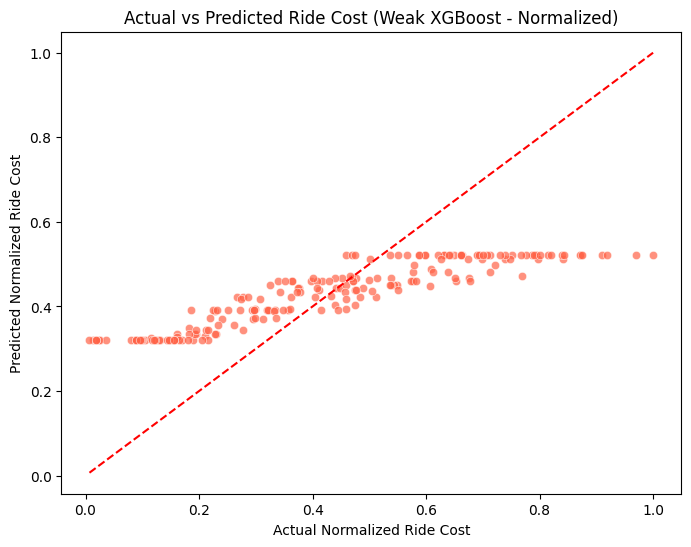

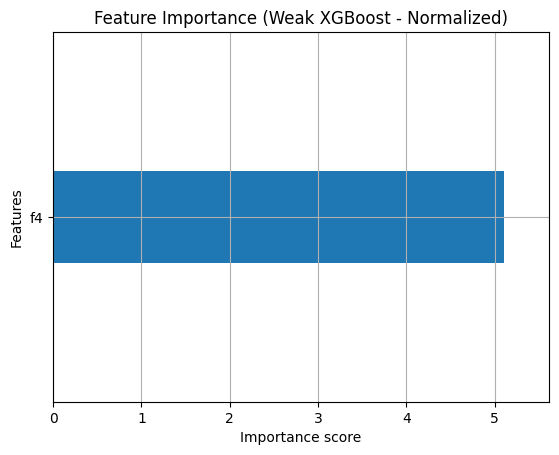


 Predicted Ride Cost (Weak XGBoost): $286.34


In [ ]:
# XGBOOST REGRESSOR
# STEP 1: Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor, plot_importance
import warnings
warnings.filterwarnings("ignore")
# STEP 2: Load Dataset
df = pd.read_csv("/content/dynamic_pricing (1).csv")
print("\n Data Loaded Successfully\n")
print("Data Snapshot:")
print(df.head())
# STEP 3: Define Features & Target
X = df.drop("Historical_Cost_of_Ride", axis=1)
y = df["Historical_Cost_of_Ride"]
# STEP 3b: Normalize target
y_scaler = MinMaxScaler()
y_norm = y_scaler.fit_transform(y.values.reshape(-1,1)).ravel()
categorical_features = ["Location_Category", "Customer_Loyalty_Status",
                        "Time_of_Booking", "Vehicle_Type"]
numerical_features = ["Number_of_Riders", "Number_of_Drivers",
                      "Number_of_Past_Rides", "Average_Ratings",
                      "Expected_Ride_Duration"]
# STEP 4: Preprocessing (Scaling + Encoding)
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ]
)
# STEP 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_norm, test_size=0.2, random_state=42
)
# STEP 6: XGBoost Regressor
xgb_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", XGBRegressor(
        objective="reg:squarederror",
        random_state=42,
        n_jobs=-1,
        n_estimators=40,
        learning_rate=0.02,
        max_depth=2,
        subsample=0.6,
        colsample_bytree=0.6,
        min_child_weight=10,
        reg_lambda=2.0,
        gamma=1.0,
        verbosity=0
    ))
])
# STEP 7: Train Model
xgb_pipeline.fit(X_train, y_train)
# STEP 8: Predictions & Evaluation
y_pred = xgb_pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
# Cross-validation RMSE
cv_scores = cross_val_score(xgb_pipeline, X_train, y_train, scoring='neg_root_mean_squared_error', cv=3)
cv_rmse = -cv_scores.mean()
print("\n XGBoost Model (Normalized Metrics)")
print("--------------------------------------")
print(f"RMSE    : {rmse:.6f}")
print(f"MAE     : {mae:.6f}")
print(f"R2      : {r2:.6f}")
print(f"CV_RMSE : {cv_rmse:.6f}")
# STEP 9: Visualization — Actual vs Predicted
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, color="tomato", alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.xlabel("Actual Normalized Ride Cost")
plt.ylabel("Predicted Normalized Ride Cost")
plt.title("Actual vs Predicted Ride Cost (Weak XGBoost - Normalized)")
plt.show()
# STEP 10: Feature Importance
# plot_importance automatically creates the figure, no need to call plt.figure separately
plot_importance(xgb_pipeline.named_steps["regressor"], importance_type="gain", height=0.5, show_values=False)
plt.title("Feature Importance (Weak XGBoost - Normalized)")
plt.show()
# STEP 11: Prediction on New Data
new_data = pd.DataFrame({
    "Number_of_Riders": [50],
    "Number_of_Drivers": [25],
    "Location_Category": ["Urban"],
    "Customer_Loyalty_Status": ["Gold"],
    "Number_of_Past_Rides": [50],
    "Average_Ratings": [4.5],
    "Time_of_Booking": ["Morning"],
    "Vehicle_Type": ["Premium"],
    "Expected_Ride_Duration": [30]
})
predicted_cost_norm = xgb_pipeline.predict(new_data)
predicted_cost_original = y_scaler.inverse_transform(predicted_cost_norm.reshape(-1,1))
print(f"\n Predicted Ride Cost (Weak XGBoost): ${predicted_cost_original[0][0]:.2f}")


 Data Loaded Successfully

   Number_of_Riders  Number_of_Drivers Location_Category  \
0                90                 45             Urban   
1                58                 39          Suburban   
2                42                 31             Rural   
3                89                 28             Rural   
4                78                 22             Rural   

  Customer_Loyalty_Status  Number_of_Past_Rides  Average_Ratings  \
0                  Silver                    13             4.47   
1                  Silver                    72             4.06   
2                  Silver                     0             3.99   
3                 Regular                    67             4.31   
4                 Regular                    74             3.77   

  Time_of_Booking Vehicle_Type  Expected_Ride_Duration  \
0           Night      Premium                      90   
1         Evening      Economy                      43   
2       Afternoon      Premiu

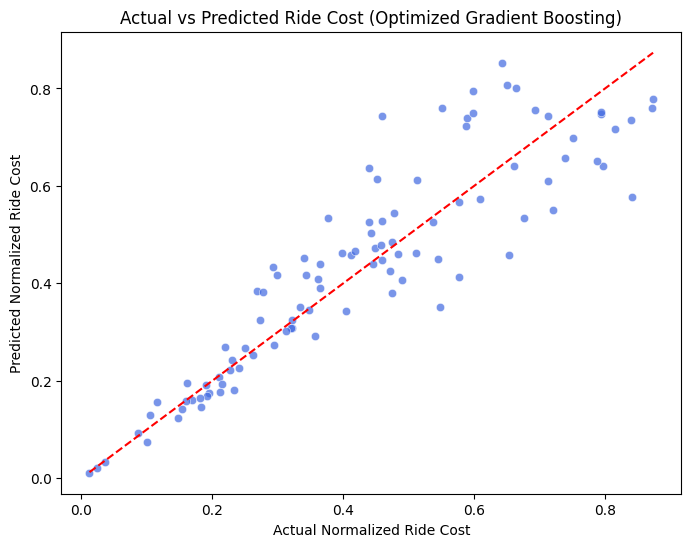


 Top 10 Most Important Features:
                                 Feature  Importance
4            num__Expected_Ride_Duration    0.870673
3                   num__Average_Ratings    0.026497
1                 num__Number_of_Drivers    0.022779
2              num__Number_of_Past_Rides    0.022477
0                  num__Number_of_Riders    0.020911
16             cat__Vehicle_Type_Premium    0.007712
15             cat__Vehicle_Type_Economy    0.007291
12          cat__Time_of_Booking_Evening    0.003352
9   cat__Customer_Loyalty_Status_Regular    0.002920
14            cat__Time_of_Booking_Night    0.002444


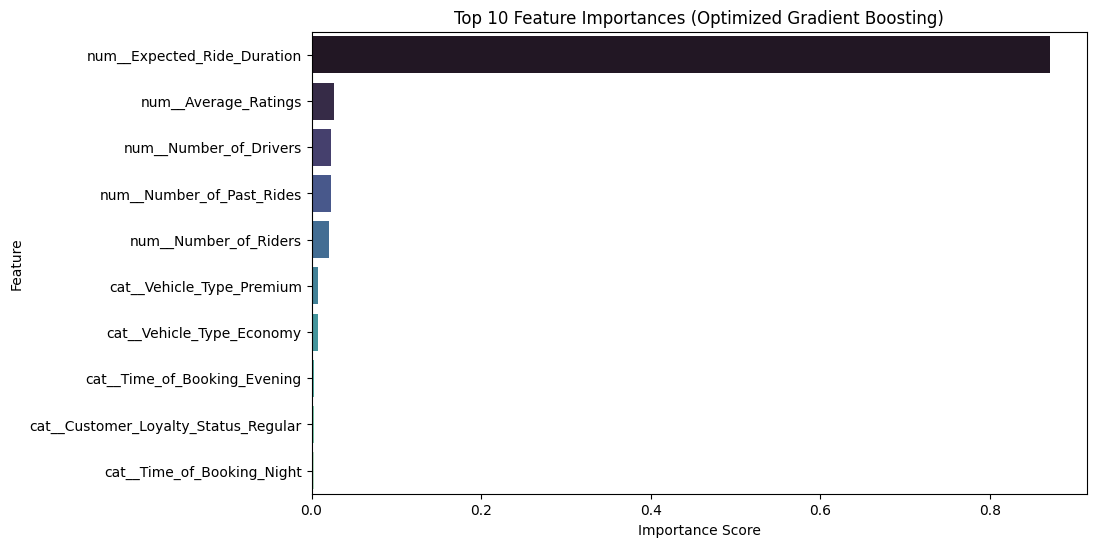


 Predicted Ride Cost (Optimized Gradient Boosting): $169.29


In [ ]:
#selected Best Model
# STEP 1: Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings("ignore")
# STEP 2: Load Dataset
df = pd.read_csv("/content/dynamic_pricing (1).csv")
print(" Data Loaded Successfully\n")
print(df.head())
# STEP 3: Define Features & Target
X = df.drop("Historical_Cost_of_Ride", axis=1)
y = df["Historical_Cost_of_Ride"]
# Normalize target
y_scaler = MinMaxScaler()
y_norm = y_scaler.fit_transform(y.values.reshape(-1,1)).ravel()
# Define features
categorical_features = ["Location_Category", "Customer_Loyalty_Status",
                        "Time_of_Booking", "Vehicle_Type"]
numerical_features = ["Number_of_Riders", "Number_of_Drivers",
                      "Number_of_Past_Rides", "Average_Ratings",
                      "Expected_Ride_Duration"]
# STEP 4: Preprocessing (Scaling + Encoding)
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_features),
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
])
# STEP 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_norm, test_size=0.1, random_state=42
)
# STEP 6: Optimized Gradient Boosting Regressor
gb_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", GradientBoostingRegressor(
        n_estimators=1000,
        learning_rate=0.05,
        max_depth=5,
        min_samples_split=2,
        min_samples_leaf=1,
        subsample=0.9,
        max_features=None,
        random_state=42
    ))
])
# STEP 7: Train Model
gb_pipeline.fit(X_train, y_train)
# STEP 8: Predictions & Evaluation
y_pred = gb_pipeline.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
cv_scores = cross_val_score(gb_pipeline, X_train, y_train, scoring='neg_root_mean_squared_error', cv=5)
cv_rmse = -cv_scores.mean()
print("\n Optimized Gradient Boosting Regressor Metrics")
print("------------------------------------------------")
print(f"RMSE    : {rmse:.6f}")
print(f"MAE     : {mae:.6f}")
print(f"R2      : {r2:.6f}")
print(f"CV_RMSE : {cv_rmse:.6f}")
# STEP 9: Visualization — Actual vs Predicted
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, color="royalblue", alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.xlabel("Actual Normalized Ride Cost")
plt.ylabel("Predicted Normalized Ride Cost")
plt.title("Actual vs Predicted Ride Cost (Optimized Gradient Boosting)")
plt.show()
# STEP 10: Feature Importance
final_gb = gb_pipeline.named_steps["regressor"]
feature_names = gb_pipeline.named_steps["preprocessor"].get_feature_names_out()
importances = final_gb.feature_importances_
feat_imp = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)
print("\n Top 10 Most Important Features:")
print(feat_imp.head(10))
plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=feat_imp.head(10), palette="mako")
plt.title("Top 10 Feature Importances (Optimized Gradient Boosting)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()
# STEP 11: Prediction on New Data
new_data = pd.DataFrame({
    "Number_of_Riders": [50],
    "Number_of_Drivers": [25],
    "Location_Category": ["Urban"],
    "Customer_Loyalty_Status": ["Gold"],
    "Number_of_Past_Rides": [50],
    "Average_Ratings": [4.5],
    "Time_of_Booking": ["Morning"],
    "Vehicle_Type": ["Premium"],
    "Expected_Ride_Duration": [30]
})
predicted_cost_norm = gb_pipeline.predict(new_data)
predicted_cost_original = y_scaler.inverse_transform(predicted_cost_norm.reshape(-1,1))
print(f"\n Predicted Ride Cost (Optimized Gradient Boosting): ${predicted_cost_original[0][0]:.2f}")


In [ ]:
#import data
import pandas as pd
# Create a dictionary with the data
data = {
    "Number_of_bikers": [60, 56, 42, 80, 78],
    "Number_of_drivers": [45, 31, 31, 22, 22],
    "Location_Category": ["Urban", "Suburban", "Rural", "Rural", "Rural"],
    "Customer_loyalty_Status": ["Silver", "Silver", "Silver", "Regular", "Regular"],
    "Number_of_Past_Rides": [13, 72, 3, 67, 74],
    "Average_Ratings": [4.2, 4.06, 3.9, 4.37, 3.77],
    "Time_of_Booking": ["Night", "Evening", "Afternoon", "Afternoon", "Evening"]
}
# Create DataFrame
df = pd.DataFrame(data)
# Display the DataFrame
print(df)

   Number_of_bikers  Number_of_drivers Location_Category  \
0                60                 45             Urban   
1                56                 31          Suburban   
2                42                 31             Rural   
3                80                 22             Rural   
4                78                 22             Rural   

  Customer_loyalty_Status  Number_of_Past_Rides  Average_Ratings  \
0                  Silver                    13             4.20   
1                  Silver                    72             4.06   
2                  Silver                     3             3.90   
3                 Regular                    67             4.37   
4                 Regular                    74             3.77   

  Time_of_Booking  
0           Night  
1         Evening  
2       Afternoon  
3       Afternoon  
4         Evening  


 Data Loaded Successfully
   Number_of_Riders  Number_of_Drivers Location_Category  \
0                90                 45             Urban   
1                58                 39          Suburban   
2                42                 31             Rural   
3                89                 28             Rural   
4                78                 22             Rural   

  Customer_Loyalty_Status  Number_of_Past_Rides  Average_Ratings  \
0                  Silver                    13             4.47   
1                  Silver                    72             4.06   
2                  Silver                     0             3.99   
3                 Regular                    67             4.31   
4                 Regular                    74             3.77   

  Time_of_Booking Vehicle_Type  Expected_Ride_Duration  \
0           Night      Premium                      90   
1         Evening      Economy                      43   
2       Afternoon      Premium

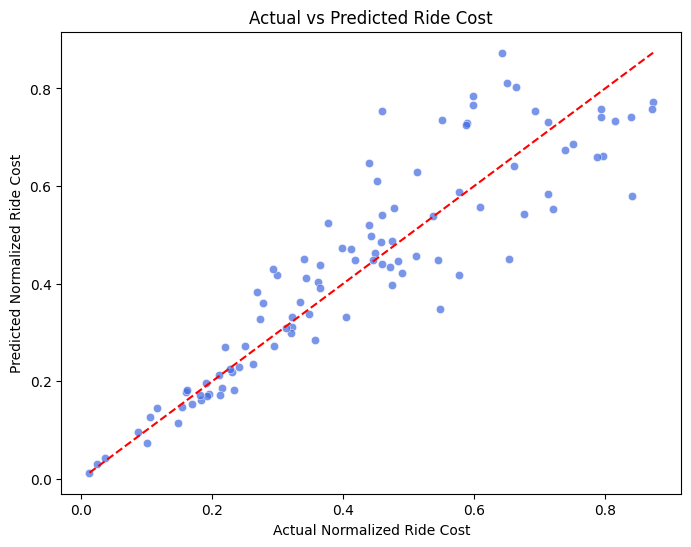


Top 10 Most Important Features:
                                 Feature  Importance
4            num__Expected_Ride_Duration    0.869751
3                   num__Average_Ratings    0.026070
1                 num__Number_of_Drivers    0.023295
2              num__Number_of_Past_Rides    0.022860
0                  num__Number_of_Riders    0.021949
16             cat__Vehicle_Type_Economy    0.007534
15             cat__Vehicle_Type_Premium    0.007382
12          cat__Time_of_Booking_Evening    0.003490
9   cat__Customer_Loyalty_Status_Regular    0.002742
13        cat__Time_of_Booking_Afternoon    0.002327


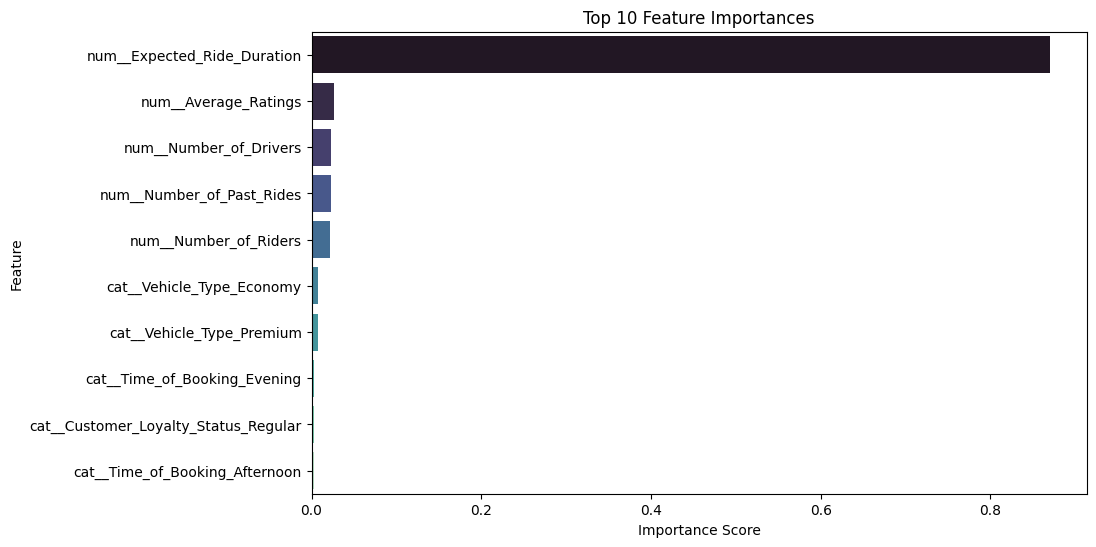


Predicted Ride Cost: $167.91

 Model saved as 'optimized_gradient_boost_model.pkl'


In [1]:
# STEP 1: Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib
import warnings
warnings.filterwarnings("ignore")
# STEP 2: Load Dataset
df = pd.read_csv("/content/dynamic_pricing (1).csv")  # Replace with your CSV path
print(" Data Loaded Successfully")
print(df.head())
print(df.columns)
# STEP 3: Define Features & Target
X = df.drop("Historical_Cost_of_Ride", axis=1)
y = df["Historical_Cost_of_Ride"]
# Normalize target
y_scaler = MinMaxScaler()
y_norm = y_scaler.fit_transform(y.values.reshape(-1,1)).ravel()
# Identify categorical & numerical features
categorical_features = ["Location_Category", "Customer_Loyalty_Status",
                        "Time_of_Booking", "Vehicle_Type"]
numerical_features = ["Number_of_Riders", "Number_of_Drivers",
                      "Number_of_Past_Rides", "Average_Ratings",
                      "Expected_Ride_Duration"]
# STEP 3a: Extract unique categories from training data
location_categories = df["Location_Category"].dropna().unique().tolist()
loyalty_categories = df["Customer_Loyalty_Status"].dropna().unique().tolist()
time_categories = df["Time_of_Booking"].dropna().unique().tolist()
vehicle_categories = df["Vehicle_Type"].dropna().unique().tolist()
# STEP 4: Preprocessing
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_features),
    ("cat", OneHotEncoder(categories=[
        location_categories,
        loyalty_categories,
        time_categories,
        vehicle_categories
    ], handle_unknown="ignore"), categorical_features)
])
# STEP 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_norm, test_size=0.1, random_state=42
)
# STEP 6: Gradient Boosting Pipeline
gb_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", GradientBoostingRegressor(
        n_estimators=1000,
        learning_rate=0.05,
        max_depth=5,
        min_samples_split=2,
        min_samples_leaf=1,
        subsample=0.9,
        max_features=None,
        random_state=42
    ))
])
# STEP 7: Train Model
gb_pipeline.fit(X_train, y_train)
print(" Model Trained Successfully")
# STEP 8: Predictions & Evaluation
y_pred = gb_pipeline.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
cv_scores = cross_val_score(gb_pipeline, X_train, y_train, scoring='neg_root_mean_squared_error', cv=5)
cv_rmse = -cv_scores.mean()
print("\nOptimized Gradient Boosting Regressor Metrics")
print("------------------------------------------------")
print(f"RMSE    : {rmse:.6f}")
print(f"MAE     : {mae:.6f}")
print(f"R2      : {r2:.6f}")
print(f"CV_RMSE : {cv_rmse:.6f}")
# STEP 9: Visualization — Actual vs Predicted
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, color="royalblue", alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.xlabel("Actual Normalized Ride Cost")
plt.ylabel("Predicted Normalized Ride Cost")
plt.title("Actual vs Predicted Ride Cost")
plt.show()
# STEP 10: Feature Importance
final_gb = gb_pipeline.named_steps["regressor"]
feature_names = gb_pipeline.named_steps["preprocessor"].get_feature_names_out()
importances = final_gb.feature_importances_
feat_imp = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)
print("\nTop 10 Most Important Features:")
print(feat_imp.head(10))
plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=feat_imp.head(10),
            hue="Feature", legend=False, palette="mako")
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()
# STEP 11: Prediction on New Data
new_data = pd.DataFrame({
    "Number_of_Riders": [50],
    "Number_of_Drivers": [25],
    "Location_Category": ["Urban"],
    "Customer_Loyalty_Status": ["Gold"],
    "Number_of_Past_Rides": [50],
    "Average_Ratings": [4.5],
    "Time_of_Booking": ["morning"],  # any case input
    "Vehicle_Type": ["Premium"],
    "Expected_Ride_Duration": [30]
})
# STEP 11a: Clean & Standardize New Data
for col in categorical_features:
    new_data[col] = new_data[col].astype(str).str.strip().str.title()
predicted_cost_norm = gb_pipeline.predict(new_data)
predicted_cost_original = y_scaler.inverse_transform(predicted_cost_norm.reshape(-1,1))
print(f"\nPredicted Ride Cost: ${predicted_cost_original[0][0]:.2f}")
# STEP 12: Save Model
MODEL_FILENAME = "optimized_gradient_boost_model.pkl"
joblib.dump(gb_pipeline, MODEL_FILENAME)
print(f"\n Model saved as '{MODEL_FILENAME}'")
